#  Be humble, sit down and check out the visualizations

#### Last Update - 15 Sept 2017 
- Added pairplot for feature interaction using **Holoviews** in second round of feature engineering
- **Multiple Interactive histograms using Plotly** to check different distance features between pickup-drop
- Correlation matrix heatmap using **Seaborn** to check the correlated variables
- Histogram of test and validation data using **Seaborn**


#### NOTE- This is my first kaggle kernel, Please do let me know by upvoting if it proves to be of any use to you or if you have any suggestion/feedback, please comment, I will try to include and make it better for learning

# Preamble 
I am always told that there are no good visualization libraries in python and also felt the same way when I saw "heads and tails" R notebook with ggplot2 and tidy. A thought wandered into my mind- is it really true ? are there no fancy visualization packages in python? So I started exploring them and found that it's absolutely wrong. So, **I will try to make this notebook as a visualization tutorial in python** and will be using data from NYC taxi competition to construct the visualizations. I will also be explaining in chronological order the way to interpret shown visualizations and how visualizations can provide beautiful ideas about new features. 

This notebook may also be used by beginners to understand the analytical thinking, how each step will be guiding us to next step will be explained thoroughly. We will have an interpretation of the plot right below it and ideas we get by that figure. I will try to make it as comprehensive as possible and will try to cover all the following packages -

| Serial No.  | Package     | Plots used in this kernel                          | Remark                              | Nature of plots
| :----------:|:----------: | :-------------------------------------------------:|:-----------------------------:|:--------------------------:|
|1| **Matplotlib** |1. vendor_id histogram, 2. store and fwd flag histogram |Matplotlib is oldest and most widely used python visualization package, its a decade old but still its the first name come to our mind when it comes to plotting. Many libraries are built on top of it, and uses its functions in the backend. Its style is very simple and that's the reason plotting is fast in this. It is used to create axis and design the layout for plotting using other libraries like seaborn.| 
|2| **Seaborn** |1.Violin plot (passenger count vs trip duration), 2. Boxplots( Weekday vs trip duration, 3. tsplot (hours, weekday vs avg trip duration), 4. distplots of lat-long, and trip_duration |Seaborn is my favorite plotting library (Not at all a fan of house greyjoy though :P) Plots from this package are soothing to eyes. Its build as a wrapper on matplotlib and many matplotlib's functions are also work with it.colors are amazing in this package's plots|
|3|**Pandas**  | 1. Parallel coordinates (for cluster characteristics) | Pandas also offer many plotting functions and it's also a package built on matplotlib, so you need to know matplotlib to tweak the defaults of pandas. It offers Alluvial plots (which are nowhere near what R offers as alluvial plots) which are used in this notebook to show cluster characteristics.|
|4|**Bokeh** |1. Time series plot (day of the year vs avg trip duration) | Bokeh is one great package which offers interactive plots, you can use bokeh with other libraries like seaborn, data-shader or holoviews, but bokeh its offers various different kind of plots. zoom, axis, and interactive legends makes bokeh different than others| **Interactive**
|5|**Folium** | 1.pickup locations in Manhattan, 2. cluster's location in the USA, 3. clusters location in Manhattan | This package offers geographical-maps and that too are interactive in nature. This package offers a different kind of terrains for maps- stemmer terrain, open street maps to name a few. you can place bubble at the locations, shift the zoom, and scroll the plot left-right-up-down and add interactions, for example - cluster plots shown in this notebook offers information about clusters like number of vehicles going out, most frequently visited clusters etc. *kaggle started supporting this package during this competition only* |**interactive**
|6|**Pygmaps** | 1. location visualizations 2. cluster visualizations | Pygmaps is available as archive package and can't even be installed using pip install command, but this package was the predecessor of gamps package but offers few great interactions which even gmaps doesn't offer. for example, a scattering of a cluster can be plotting with this one better than with gmaps. This package was way underdeveloped and developed version of it is know as gmaps yet, it was able to generate beautiful vizs. plots made my this package are best viewed in browsers.|**interactive**
|7|**Plotly**| 1.bubble plot |This is another great package which offers colorful visualizations, but some of these beautiful plots require to interact with plotly server so you need API key and it will call the API.|**interactive**
|8|**Gmaps**|*To be updated*|gmaps provide great features like- route features, and we all are too used to gmaps, so feel like home.|**interactive**
|9|**Ggplot2** | 1. Weather plots of NYC for given period | gglots are now available in python as well, and its kind of in developing state and documentation is less of this package which makes it a little difficult but at the same time it provides very beautiful plots, so there is a tradeoff ;)|**interactive**
|10|**Basemaps**| *Will not be added in this kernel*|As long as you are not developing any maps related library, there are no benefits of using basemaps. They offer many options but using them is difficult, due to lots of arguments, different style, and less amount of documentation, and many lines of codes sometimes will be required to plot a map.|
|11|**No package**| 1. heatmaps of NYC taxi traffic |Instead of depending on data-shadder, I tried plotting the heatmap of traffic data with a row image, you will get to know the basics of image processing( reading image, color schemes that's all :P ) and how such basic exercise can result in traffic heatmap|
|12|**Datashader**| 1.locations' heatmap| If you really have a very large size of data that you want to plot on a map, data shader is one of the best easiest option available in marker. But I found that row image processing and generating plots using a scipy.mics or cv2 is considerably faster than using this package.|**interactive**
|13|**Holoviews**|1. Pairplot for feature interaction.|Holoviews is another alternative for making interactive visualizations, this package offers artistic plots. But you need really good RAM etc to use this package, else the notebook will get hang. plots exported to HTML works perfectly fine|**interactive**

*I have also included one **animation** in this notebook, using matplotlib's animation to show the pickup-drop heatmap for different hour of the day, i.e. density of pick-drops in different portion of the city with time.*

Some of the above packages are not supported by kaggle kernels and you have to download the notebook to get them working, I will put such plots in either appendix or will explicitly mention it above the cell creating such plots. After going through all these visualizations, I will use the extracted features to build a XGBoost model to do the predictions. The main motive of this notebook is to explore what is available, and how it can be used to visualize the data better.


## About Competition 
In this competition, we are asked to build a model to predict trip duration for given pick and drop lat-long. We will keep on analyzing the data and extract features as we go forward with this notebook. Let's start getting our hands dirty with data.We will be using following datasets in this competition to generate a model and providing visuals -

| Serial No.  | Datasets used | Description |
| :----------:|:----------: |:-----------------------------:|
|1|NYC taxi train-test| Datasets provided as standard data for this competition.
|2|NYC OSRM dataset| Dataset contains, fastest route, and second fastest route and path, trip duration information.
|3|Weather data| Dataset contain, precipitation, snowfall etc for given time duration of data.



#### Importing packages for analysis

In [1]:
import pandas as pd  #pandas for using dataframe and reading csv 
import numpy as np   #numpy for vector operations and basic maths 
#import simplejson    #getting JSON in simplified format
import urllib        #for url stuff
#import gmaps       #for using google maps to visulalize places on maps
import re            #for processing regular expressions
import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
import scipy         #for other dependancies
from sklearn.cluster import KMeans # for doing K-means clustering
from haversine import haversine # for calculating haversine distance
import math          #for basic maths operations
import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands
from scipy.misc import imread, imresize, imsave  # for plots 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
from IPython.display import HTML
from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation
import io
import base64
output_notebook()
plotly.offline.init_notebook_mode() # run at the start of every ipython notebook

Loading BokehJS ...

### Reading and checking the head of training data and data from OSRM fastest route dataset
Training data is given as primary dataset for this competition and is available from the beginning of the competition. After almost 2 weeks from the start of this competition, oscarleo uploaded this dataset in Kaggle datasets. This dataset is generated from Open Source Routing Machine. This is similar to Gmaps but this is open source, so a user can make any number of queries using this engine ( Unlike Gmaps, where per day limit of free requests is 2000. Though I have compared the results of OSRM with that if Gmaps, Gmaps results considerably different than this one, almost all the results for time duration are different **with the same fraction**. So, while training any regressor, it will help very much in predicting trip duration. I am importing both of these datasets in the start of our analysis. 


In [2]:
s = time.time()
train_fr_1 = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_1.csv')
train_fr_2 = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_train_part_2.csv')
train_fr = pd.concat([train_fr_1, train_fr_2])
train_fr_new = train_fr[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
train_df = pd.read_csv('../input/new-york-city-taxi-with-osrm/train.csv')
train = pd.merge(train_df, train_fr_new, on = 'id', how = 'left')
train_df = train.copy()
end = time.time()
print("Time taken by above cell is {}.".format((end-s)))
train_df.head()

Time taken by above cell is 20.852095127105713.


id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  total_distance  \
0         40.765602                  N            455          2009.1   
1         40.731152                  N            663          2513.2   
2         40.710087                  N           2124         11060.8   
3         40.706718                  N            429          1779.4   
4         40.782520                  N            435          1614.9   

   total_travel_time  number_of_steps  
0              164.9              5.0  
1              332.0              6.0  
2              767.6             16.0  
3              235.8              4.0  
4              140.1              5.0

In [3]:
# checking if Ids are unique, 
start = time.time()
train_data = train_df.copy()
start = time.time()
print("Number of columns and rows and columns are {} and {} respectively.".format(train_data.shape[1], train_data.shape[0]))
if train_data.id.nunique() == train_data.shape[0]:
    print("Train ids are unique")
print("Number of Nulls - {}.".format(train_data.isnull().sum().sum()))
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

Number of columns and rows and columns are 14 and 1458644 respectively.
Train ids are unique
Number of Nulls - 3.
Time taken by above cell is 1.069046974182129.


We see that training data contains 14 columns and ~1.4 Million data records, with No nulls are present in out dataset.

### Lets visualize the trip duration given using log-scale distplot in sns
We are asked to predict trip_duration of the test set, so we first check what kind of trips durations are present in the dataset. First I plotted it on a plain scale and not on a log scale, and some of the records have very long trip durations ~100 hours. Such long trips are making all another trip invisible in the histogram on plain scale => We go ahead with the log scale. Another reason of using the log scale for visualizing trip-duration on the log scale is that this competition uses rmsle matrix so it would make sense to visualize the target variable in log scale only.

Time taken by above cell is 0.4894740581512451.


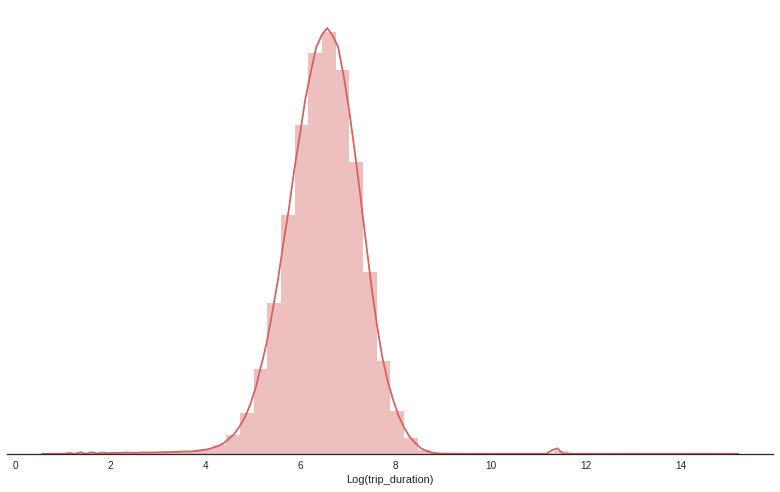

In [4]:
%matplotlib inline
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train_df['trip_duration'].values+1), axlabel = 'Log(trip_duration)', label = 'log(trip_duration)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

**Findings** - It is clear with the above histogram and kernel density plot that the trip-durations are like Gaussian and few trips have very large duration, like ~350000 seconds which is 100 hours (which is weird, as long as it isn't an intercity taxi ride from NYC to SF or Alaska), while most of the trips are e^4 = 1 minute to e^8 ~ 60 minutes. and probably are taken inside Manhattan or in new york only. Let's check the lat-long distributions are then used them to have a heat map kind of view of given lat-longs.

Time taken by above cell is 1.9544081687927246.


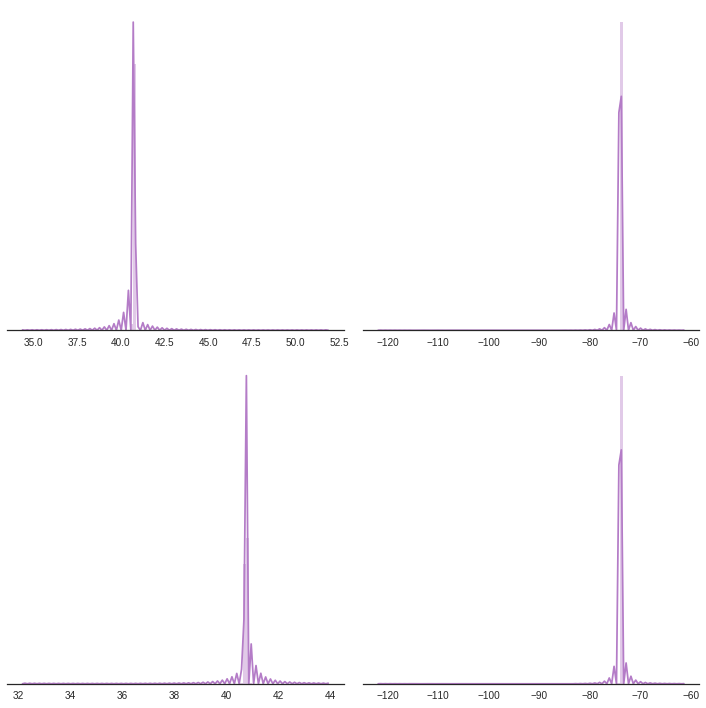

In [5]:
start = time.time()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(train_df['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train_df['pickup_longitude'].values, label = 'pickup_longitude',color="m",bins =100, ax=axes[0,1])
sns.distplot(train_df['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train_df['dropoff_longitude'].values, label = 'dropoff_longitude',color="m",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
plt.show()

**Findings** - From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 ton-73. We are not getting any histogram kind of plots when we are plotting lat-long as the distplot function of sns is getting affected by outliers, trips which are very far from each other like lat 32 to lat 44, are taking very long time, and have affected this plot such that it is coming off as a spike. Let's remove those large duration trip by using a cap on lat-long and visualize the distributions of latitude and longitude given to us.

Time taken by above cell is 4.986181020736694.
1452385 1458644


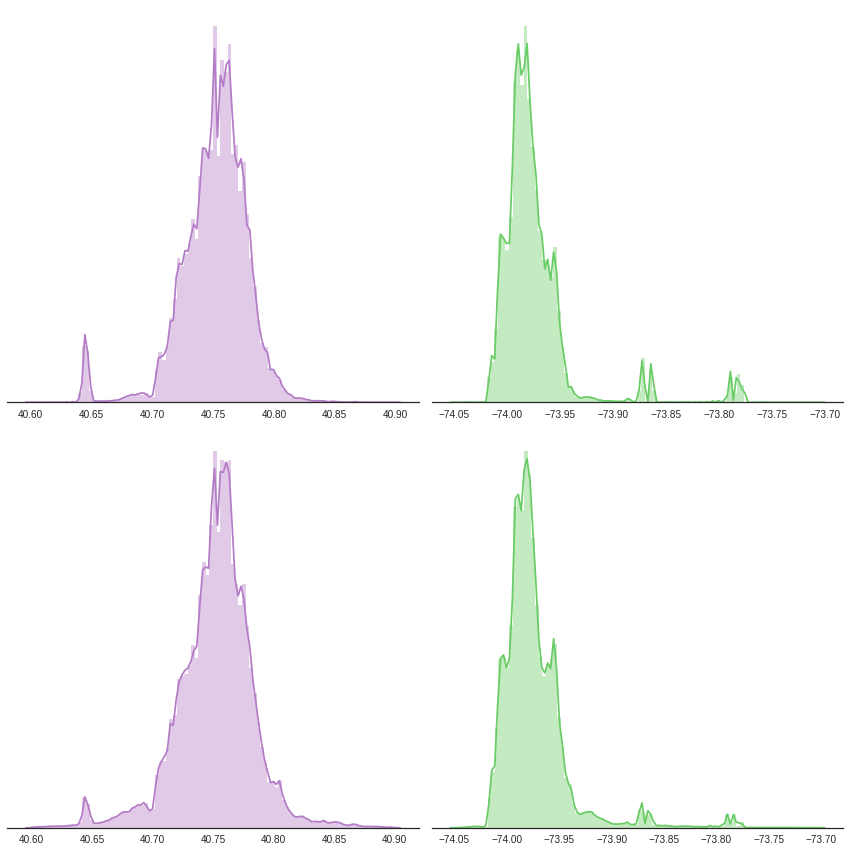

In [6]:
start = time.time()
df = train_df.loc[(train_df.pickup_latitude > 40.6) & (train_df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
train_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(train_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(train_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
print(df.shape[0], train_data.shape[0])
plt.show()

**Findings** - We put the following caps on lat-long -
- latitude should be between 40.6 to 40.9
- Longitude should be between -74.05 to -73.70 

We get that the distribution spikes becomes as distribution in distplot (distplot is a histogram plot in seaborn package), we can see that most of the trips are getting concentrated between these lat-long only. Let's plot them on an empty image and check what kind of a city map we are getting as we can't use gmaps and folium on kaggle kernel for visualizations. 
**Update** - As at that time we didn't have folium in kaggle python docker, Now we have it and I have included beautiful folium visualizations in this kernel.

In [7]:
start = time.time()
temp = train_data.copy()
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:, 'pick_date'] = train_data['pickup_datetime'].dt.date
train_data.head()

ts_v1 = pd.DataFrame(train_data.loc[train_data['vendor_id']==1].groupby('pick_date')['trip_duration'].mean())
ts_v1.reset_index(inplace = True)
ts_v2 = pd.DataFrame(train_data.loc[train_data.vendor_id==2].groupby('pick_date')['trip_duration'].mean())
ts_v2.reset_index(inplace = True)

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show
#from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
output_notebook()
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'

for data, name, color in zip([ts_v1, ts_v2], ["vendor 1", "vendor 2"], Spectral4):
    df = data
    p.line(df['pick_date'], df['trip_duration'], line_width=2, color=color, alpha=0.8, legend=name)

p.legend.location = "top_left"
p.legend.click_policy="hide"
show(p)
end = time.time()
train_data = temp
print("Time Taken by above cell is {}.".format(end - start))

Loading BokehJS ...

/opt/conda/lib/python3.6/site-packages/bokeh/core/json_encoder.py:73: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp



Time Taken by above cell is 7.658262014389038.


## Heatmap of coordinates
### Let's do basic image processing here 
We have taken an empty image and make it a color it black so that we can see colors where the lat-longs are falling. To visualize we need to consider each point of this image as a point represented by lat-long, to achieve that we will bring the lat-long to image coordinate range and then take a summary of lat-long and their count, assign a different color for different count range. Running next cell will result in beautiful visualization shown below.

This is the very low-level implementation of making plots. As in the early stage of competition people using R was making plots on leaflet and we, Python users were missing gmaps and folium in kaggle kernel's python docker, I requested them to get the folium installed but it took some time and I wasn't aware of the "datashader" package that time.So, I decided to use the knowledge I gained in last kaggle competition I participated in (Nature Conservancy Fisheries Monitoring) and made such plots using basic image processing. 

Time taken by above cell is 8.378548860549927.


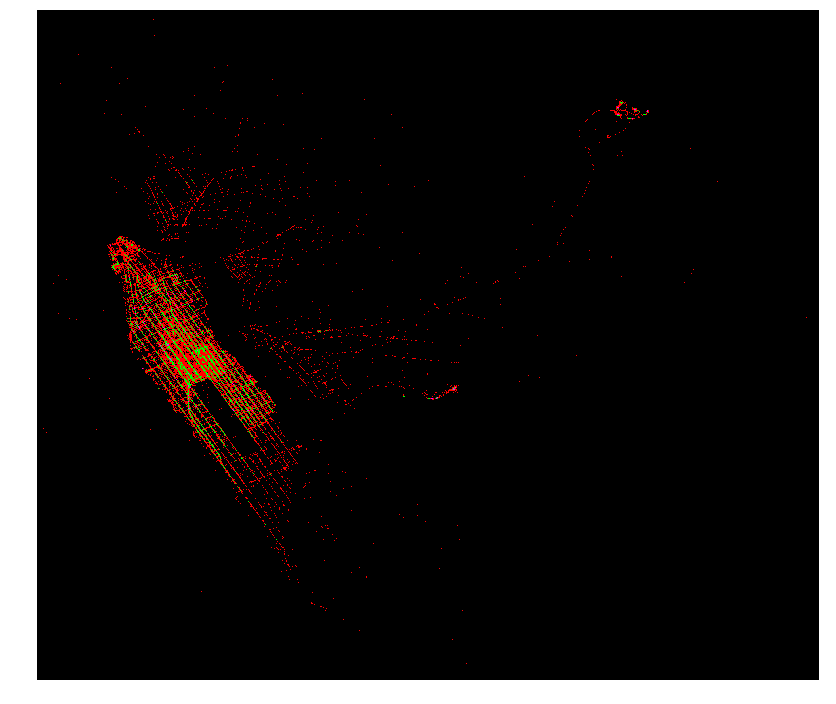

In [8]:
start = time.time()
rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
rgb[..., 0] = 0
rgb[..., 1] = 0
rgb[..., 2] = 0
train_data_new['pick_lat_new'] = list(map(int, (train_data_new['pickup_latitude'] - (40.6000))*10000))
train_data_new['drop_lat_new'] = list(map(int, (train_data_new['dropoff_latitude'] - (40.6000))*10000))
train_data_new['pick_lon_new'] = list(map(int, (train_data_new['pickup_longitude'] - (-74.050))*10000))
train_data_new['drop_lon_new'] = list(map(int,(train_data_new['dropoff_longitude'] - (-74.050))*10000))

summary_plot = pd.DataFrame(train_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

summary_plot.reset_index(inplace = True)
summary_plot.head(120)
lat_list = summary_plot['pick_lat_new'].unique()
for i in lat_list:
    lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
    unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
    for j in lon_list:
        a = unit[lon_list.index(j)]
        if (a//50) >0:
            rgb[i][j][0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 255
        elif (a//10)>0:
            rgb[i,j, 0] = 0
            rgb[i,j, 1] = 255
            rgb[i,j, 2] = 0
        else:
            rgb[i,j, 0] = 255
            rgb[i,j, 1] = 0
            rgb[i,j, 2] = 0
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))
ax.imshow(rgb, cmap = 'hot')
ax.set_axis_off() 

**Findings** - From the heatmap kind of image above -
- Red points signifies that 1-10 trips in the given data have that point as pickup point
- Green points signifies that more than 10-50 trips in the given data have that point as pickup point 
- Yellow points signifies that more than 50+ trips in the given data have that point as pickup point

Clearly, the whole manhattan is yellow colored and with few green points as well, that shows that in Manhatten most of the trips are getting originated.  This is the basic way in which you can plot large geospatial data in an empty image without being dependent on any package. But if you hate image processing, you can use **datashader**, datashader is a package which is used to show billions of data points on an image, they also use the similar approach with a different color gradient.
Thought I will also show the same plot with a sample data of 1000 trips on pygmaps in next few cell. it will generate an HTML in output and user has to open that HTML in the browser.

## Let's define few functions to unfold features in the given data 
We are supposed to predict trip_duration for given rides, for that we have to do some feature engineering and find out features which are affecting the trip-duration between a given pickup and drop-off locations. We are given lat-log => distance features can be calculated, we are given DateTime => DateTime features can be calculated, we are given variables like vendor_id, store_n_fwd_flag which themselves would act like features. Lets formally begin feature extraction ...

In [9]:
start = time.time()
def haversine_(lat1, lng1, lat2, lng2):
    """function to calculate haversine distance between two co-ordinates"""
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return(h)

def manhattan_distance_pd(lat1, lng1, lat2, lng2):
    """function to calculate manhatten distance between pick_drop"""
    a = haversine_(lat1, lng1, lat1, lng2)
    b = haversine_(lat1, lng1, lat2, lng1)
    return a + b

import math
def bearing_array(lat1, lng1, lat2, lng2):
    """ function was taken from beluga's notebook as this function works on array
    while my function used to work on individual elements and was noticably slow"""
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

end = time.time()
print("Time taken by above cell is {}.".format((end-start)))

Time taken by above cell is 0.0004258155822753906.


# Feature extratction -  


In [10]:
start = time.time()
train_data = temp.copy()
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:, 'pick_month'] = train_data['pickup_datetime'].dt.month
train_data.loc[:, 'hour'] = train_data['pickup_datetime'].dt.hour
train_data.loc[:, 'week_of_year'] = train_data['pickup_datetime'].dt.weekofyear
train_data.loc[:, 'day_of_year'] = train_data['pickup_datetime'].dt.dayofyear
train_data.loc[:, 'day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data.loc[:,'hvsine_pick_drop'] = haversine_(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)
train_data.loc[:,'manhtn_pick_drop'] = manhattan_distance_pd(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)
train_data.loc[:,'bearing'] = bearing_array(train_data['pickup_latitude'].values, train_data['pickup_longitude'].values, train_data['dropoff_latitude'].values, train_data['dropoff_longitude'].values)

end = time.time()
print("Time taken by above cell is {}.".format(end-start))

Time taken by above cell is 11.533161163330078.


# Animation of cab pickups
Now that we have datetime features extracted, we can see the impact of pickup hour on trip_duration. Like in some hour vary a large number of pickup are done that means traffic will be there and trip_duration will be a little bit longer. Let's just plot the heatmap and make an animation of pickup and see how with pickup hours the traffic changes....

What we are doing here is we are making similar heatmaps of pickup locations for different pickup hours and then will make a gif of those images in order of increasing pickup hour.

In [11]:
start = time.time()
def color(hour):
    """function for color change in animation"""
    return(10*hour)

def Animation(hour, temp, rgb):
    """Function to generate return a pic of plotings"""
    #ax.clear()
    train_data_new = temp.loc[temp['hour'] == hour]
    start = time.time()
    rgb = np.zeros((3000, 3500, 3), dtype=np.uint8)
    rgb[..., 0] = 0
    rgb[..., 1] = 0
    rgb[..., 2] = 0
    train_data_new['pick_lat_new'] = list(map(int, (train_data_new['pickup_latitude'] - (40.6000))*10000))
    train_data_new['drop_lat_new'] = list(map(int, (train_data_new['dropoff_latitude'] - (40.6000))*10000))
    train_data_new['pick_lon_new'] = list(map(int, (train_data_new['pickup_longitude'] - (-74.050))*10000))
    train_data_new['drop_lon_new'] = list(map(int,(train_data_new['dropoff_longitude'] - (-74.050))*10000))

    summary_plot = pd.DataFrame(train_data_new.groupby(['pick_lat_new', 'pick_lon_new'])['id'].count())

    summary_plot.reset_index(inplace = True)
    summary_plot.head(120)
    lat_list = summary_plot['pick_lat_new'].unique()
    for i in lat_list:
        #print(i)
        lon_list = summary_plot.loc[summary_plot['pick_lat_new']==i]['pick_lon_new'].tolist()
        unit = summary_plot.loc[summary_plot['pick_lat_new']==i]['id'].tolist()
        for j in lon_list:
            #j = int(j)
            a = unit[lon_list.index(j)]
            #print(a)
            if (a//50) >0:
                rgb[i][j][0] = 255 - color(hour)
                rgb[i,j, 1] = 255 - color(hour)
                rgb[i,j, 2] = 0 + color(hour)
            elif (a//10)>0:
                rgb[i,j, 0] = 0 + color(hour)
                rgb[i,j, 1] = 255 - color(hour)
                rgb[i,j, 2] = 0 + color(hour)
            else:
                rgb[i,j, 0] = 255 - color(hour)
                rgb[i,j, 1] = 0 + color(hour)
                rgb[i,j, 2] = 0 + color(hour)
    #fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
    end = time.time()
    print("Time taken by above cell is {} for {}.".format((end-start), hour))
    return(rgb)
end = time.time()
print("Time taken by above cell is {}.".format(end -start))

Time taken by above cell is 0.0007383823394775391.


In [12]:
start = time.time()
images_list=[]
train_data_new['pickup_datetime'] = pd.to_datetime(train_data_new.pickup_datetime)
train_data_new.loc[:, 'hour'] = train_data_new['pickup_datetime'].dt.hour

for i in list(range(0, 24)):
    im = Animation(i, train_data_new, rgb.copy())
    images_list.append(im)
end = time.time()
print("Time taken by above cell is {}.".format(end -start))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

Time taken by above cell is 3.2044193744659424 for 0.
Time taken by above cell is 2.815016746520996 for 1.
Time taken by above cell is 2.708259105682373 for 2.
Time taken by above cell is 2.5191409587860107 for 3.
Time taken by above cell is 2.6736369132995605 for 4.
Time taken by above cell is 2.4840896129608154 for 5.
Time taken by above cell is 2.8140079975128174 for 6.
Time taken by above cell is 3.061504364013672 for 7.
Time taken by above cell is 3.1033682823181152 for 8.
Time taken by above cell is 2.9475510120391846 for 9.
Time taken by above cell is 2.9651832580566406 for 10.
Time taken by above cell is 2.937535285949707 for 11.
Time taken by above cell is 3.0124454498291016 for 12.
Time taken by above cell is 3.0207102298736572 for 13.
Time taken by above cell is 2.998182535171509 for 14.
Time taken by above cell is 3.0603017807006836 for 15.
Time taken by above cell is 2.9092633724212646 for 16.
Time taken by above cell is 3.084521770477295 for 17.
Time taken by above cell i

In [13]:
start = time.time()
def build_gif(imgs = images_list, show_gif=False, save_gif=True, title=''):
    """function to create a gif of heatmaps"""
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
    ax.set_axis_off()
    hr_range = list(range(0,24))
    def show_im(pairs):
        ax.clear()
        ax.set_title('Absolute Traffic - Hour ' + str(int(pairs[0])) + ':00')
        ax.imshow(pairs[1])
        ax.set_axis_off() 
    pairs = list(zip(hr_range, imgs))
    #ims = map(lambda x: (ax.imshow(x), ax.set_title(title)), imgs)
    im_ani = animation.FuncAnimation(fig, show_im, pairs,interval=500, repeat_delay=0, blit=False)
    plt.cla()
    if save_gif:
        im_ani.save('animation.gif', writer='imagemagick') #, writer='imagemagick'
    if show_gif:
        plt.show()
    return
end = time.time()
print("Time taken by above cell is {}".format(end-start))

Time taken by above cell is 0.00024509429931640625


31.046421766281128


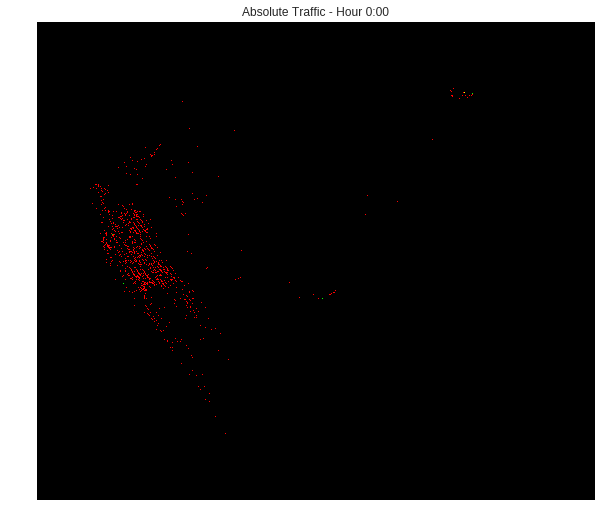

In [14]:
start = time.time()
build_gif()
end = time.time()
print(end-start)

#### At 12 midnight, we gets this kind of cab request in NYC (Above) and then they varies with time in shown fashion (Below)


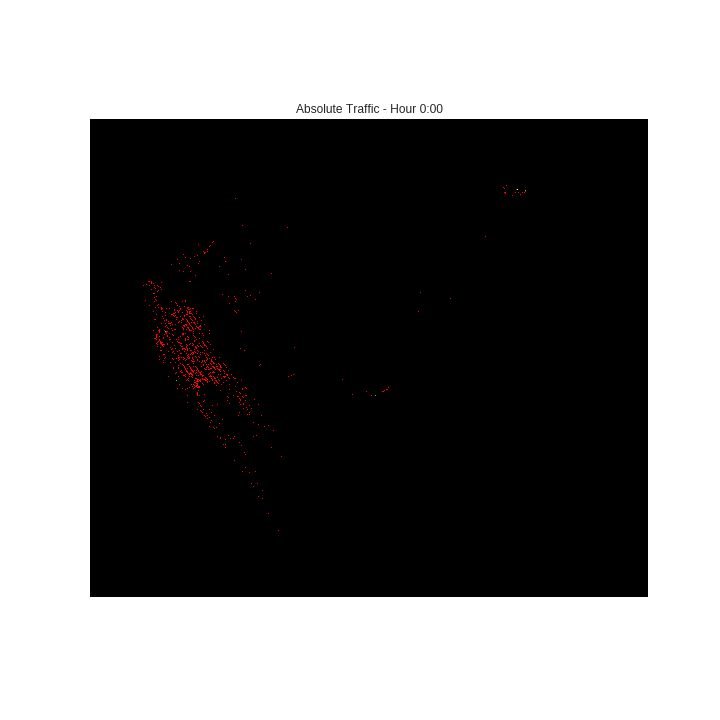

In [15]:
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

**Findings ** - from the heatmap animation, we can see the-the least number of request comes from time 2 AM to 7 AM, and from 7 AM to 4 PM the requests were moderate in number, and from 5 PM 1 AM in night, we can see a huge amount of request of cabs in all NYC.

Aso, the dot that is being shown in the top right corner of this animation is JFK Airport => Same rule also applies, people are moving less between 2 AM to 6 AM.

# Features' Exploration (Checking if we have any explainable pattern) -
Even if we don't visualize these features we can make model and model will predict the trip_duration, then why are we visualizing? - Because - it will give us an explanation of model's output and will give us some pattern which may even guide if we should make multiple models, or one model if we should include that particular variable or there is no sense in including that variable. in short - it will give us new ideas to make a model. 
**Note** - Basically in consulting world, if you can't explain model it won't sell, and without visuals, it's very hard to explain patterns.
- **1. Let's check the average time taken by two different vendors vs weekday**

0.47080111503601074


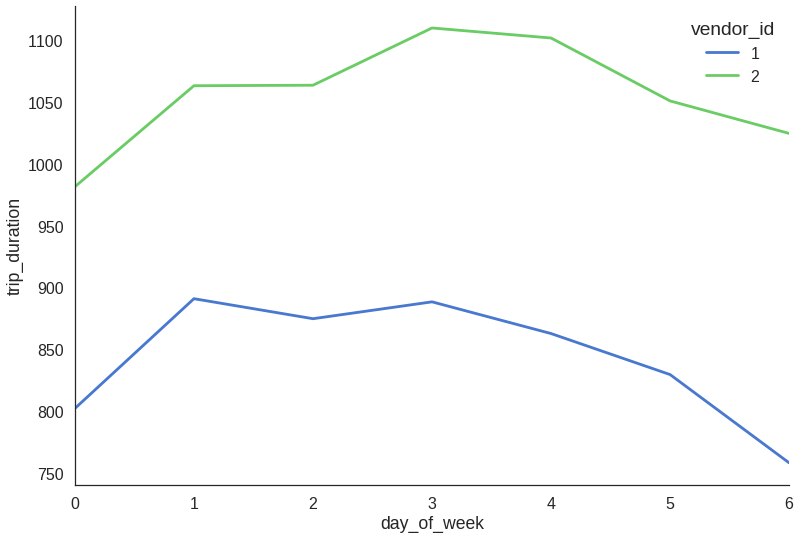

In [16]:
start = time.time()
summary_wdays_avg_duration = pd.DataFrame(train_data.groupby(['vendor_id','day_of_week'])['trip_duration'].mean())
summary_wdays_avg_duration.reset_index(inplace = True)
summary_wdays_avg_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=summary_wdays_avg_duration, time="day_of_week", unit = "unit", condition="vendor_id", value="trip_duration")
sns.despine(bottom = False)
end = time.time()
print(end - start)


**Findings** - it's clear that the vendor 1 is taking more time than vendor 2 on all the days of the week, we can also subset data frame based on the month and that will also give us the same results. The difference between the average time taken by vendor 1 is ~250 seconds more than vendor 2. 

### Violin Plot -
When someone says seaborn, two things come to my mind first greyjoys ( GOT fan I am ;) ) and second violin plots, I know seaborn package because of it's violin plots, so I will explain the distributions of next variable with violin plots. Following are few facts about violin plots -  
- Violin plot can be made using seaborn package in python and with split
- Here we are using them to check the distributions, and horizontal lines inside them shows the quartiles
- Green one is vendor 1 and red one is vendor 2 and trip_duration is plotted on log scale

182


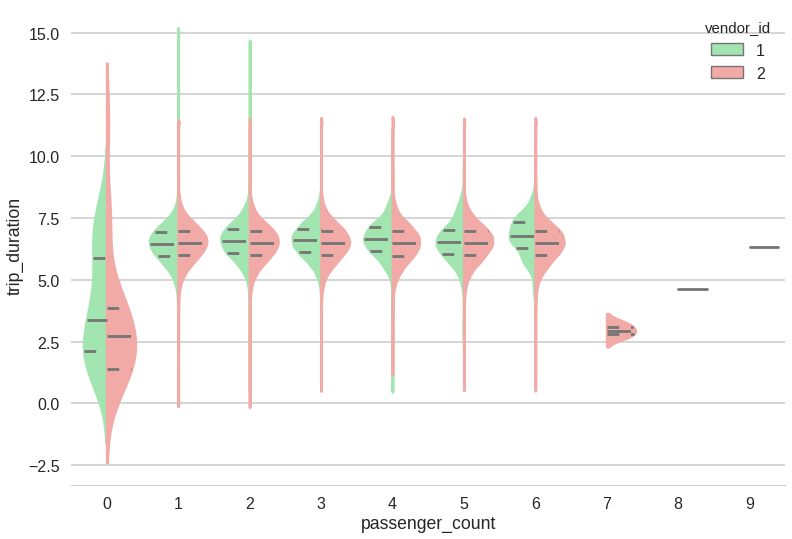

In [17]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context("poster")
train_data2 = train_data.copy()
train_data2['trip_duration']= np.log(train_data['trip_duration'])
sns.violinplot(x="passenger_count", y="trip_duration", hue="vendor_id", data=train_data2, split=True,
               inner="quart",palette={1: "g", 2: "r"})

sns.despine(left=True)
print(df.shape[0])

**Findings** -
- There are trips for both the vendor with zeros passengers and few of these trips have negative time as well, I don't understand how can a taxi trip have negative time, possibly they aren't right data points to train the model, we would remove them before making model
- Trips with zero passengers can be trips when a taxi is called to a particular location and the customer is charged for getting the taxi there, that is one possible explanation.
- Distributions are similar for both the vendors, but vendor one has more number of larger trips than vendor two for passenger count 2 and 3
- There are very less number of trips with passenger count 7, 8 and 9

## Box-Plots 
**Interpretation**
- Most popular plots to check the distribution of variables
- box covers data from second and third quadrant and rest is shorn by bars
- Dots on the both side of bars shows outliers

3526282
Time taken by above cell is 0.9407963752746582.


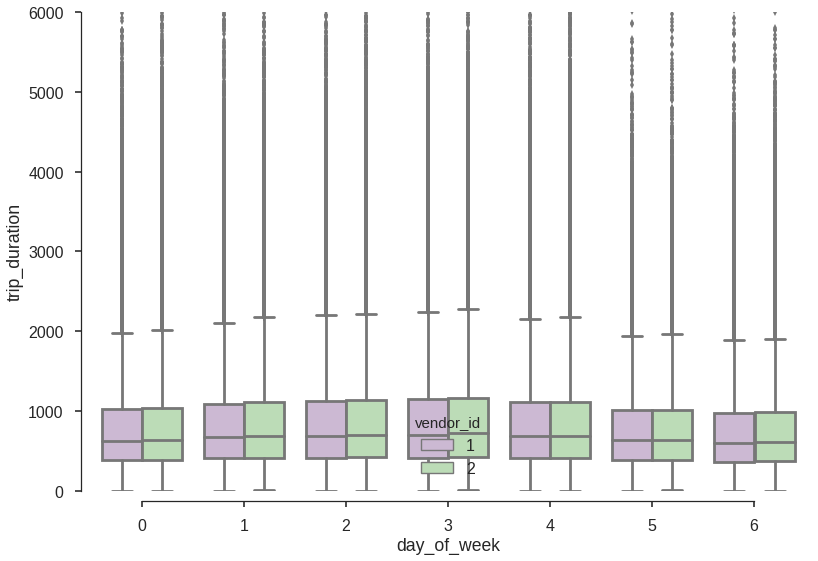

In [18]:
start = time.time()
sns.set(style="ticks")
sns.set_context("poster")
sns.boxplot(x="day_of_week", y="trip_duration", hue="vendor_id", data=train_data, palette="PRGn")
plt.ylim(0, 6000)
sns.despine(offset=10, trim=True)
print(train_data.trip_duration.max())
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

**Findings** -
- From the boxplot above we can see that 75%ile of avg trip duration on Sunday(0) and Saturday(6) is less than 2000 seconds. i.e. around 33 minutes
- Time taken by Monday, Tuesday, Wednesday, and Thursday are greater than rest of the days.

## line-plots 
- Simple lineplots can explain how the trip duration is changing with time for different days of week
- very easy to interpret

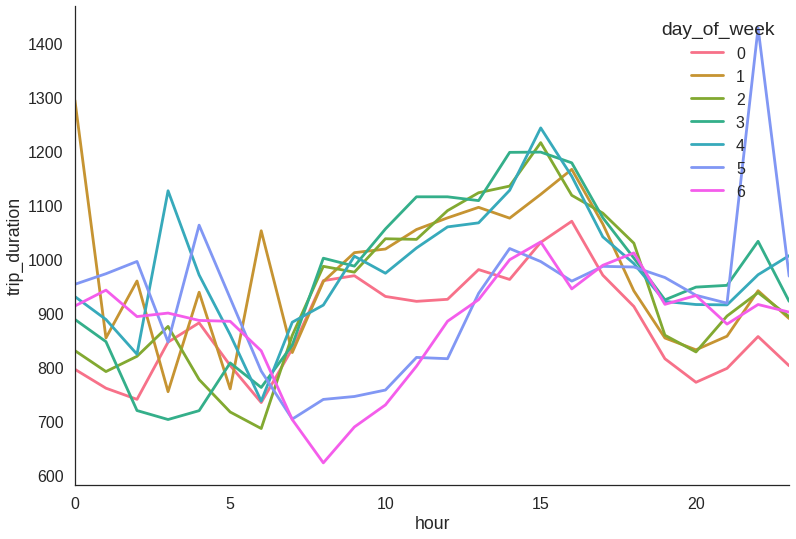

In [19]:
summary_hour_duration = pd.DataFrame(train_data.groupby(['day_of_week','hour'])['trip_duration'].mean())
summary_hour_duration.reset_index(inplace = True)
summary_hour_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")
sns.tsplot(data=summary_hour_duration, time="hour", unit = "unit", condition="day_of_week", value="trip_duration")
sns.despine(bottom = False)

**findings** - 
- Its clear from the above plot that on day 0, that is Sunday and day 6 that is Saturday, the trip duration is very less that all the weekdays at 5 AM to 15 AM time. 
- See this, on  Saturday around midnight, the rides are taking far more than usual time, this is obvious through now verified  using given data

# Cluster analysis and visualization
# But, Why should I make clusters ?? 
#### Coz, Uber uses it, hell NO!! 
#### Coz, Everyone in this competition is using it, Hell NO!!
#### Coz - 

When I started writing this kernel and working for this competition, The most easy approach that came to my mind to use Gmaps, use in some way hacking to request trip-duration for given lat-long, So I have started writing code for calling google gmaps API, but latter found that using gmaps distance matrix API only 2000 requests can be processed. So, My initial plan got failed, and remaining of which I have kept in Appendix of this kernel :P 

So, 2000 requests can be processed right? I thought okay let's make groups for which I will make the API requests and then using some approximation ( haversine distance or any distance and avg vendor speed) I will predict the ride time), So 45C2 = 1980, So settled with 45 clusters that time. =>That's where it struck me that clustering can be a very important feature even if we don't use distance matrix. Clustering can give us many pieces of information like - if we know pickup is in cluster 4 and drop is in cluster 9, and max flow from cluster 4 is to cluster 9, we will know that the trip-duration is going to be more than otherwise. 

** That's exactly the way Uber decides surge pricing, if there is more flow from x cluster to z cluster, surge will be different, and from x to w surge will be different and will be less than x to z trip.** 

As now Kaggle has folium package installed, so I will be using folium package for visualizations and we will be visualizing clusters on maps. Folium is map-based interactive package and it's open source as well. It's based on leaflet js, it is great to see that finally python docker (kaggle) too have such nice map package available. It is interactive in nature, balloons on the map can be clicked and they will show characteristics of that clusters.( flow of rides and what not, you can code anything..)


In [20]:
start = time.time()
def assign_cluster(df, k):
    """function to assign clusters """
    df_pick = df[['pickup_longitude','pickup_latitude']]
    df_drop = df[['dropoff_longitude','dropoff_latitude']]
    """I am using initialization as from the output of
    k-means from my local machine to save time in this kernel"""
    init = np.array([[ -73.98737616,   40.72981533],
       [-121.93328857,   37.38933945],
       [ -73.78423222,   40.64711269],
       [ -73.9546417 ,   40.77377538],
       [ -66.84140269,   36.64537175],
       [ -73.87040541,   40.77016484],
       [ -73.97316185,   40.75814346],
       [ -73.98861094,   40.7527791 ],
       [ -72.80966949,   51.88108444],
       [ -76.99779701,   38.47370625],
       [ -73.96975298,   40.69089596],
       [ -74.00816622,   40.71414939],
       [ -66.97216034,   44.37194443],
       [ -61.33552933,   37.85105133],
       [ -73.98001393,   40.7783577 ],
       [ -72.00626526,   43.20296402],
       [ -73.07618713,   35.03469086],
       [ -73.95759366,   40.80316361],
       [ -79.20167796,   41.04752096],
       [ -74.00106031,   40.73867723]])
    k_means_pick = KMeans(n_clusters=k, init=init, n_init=1)
    k_means_pick.fit(df_pick)
    clust_pick = k_means_pick.labels_
    df['label_pick'] = clust_pick.tolist()
    df['label_drop'] = k_means_pick.predict(df_drop)
    return df, k_means_pick

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

time taken by thie script by now is 0.0002887248992919922.


In [21]:
start = time.time()
train_cl, k_means = assign_cluster(train_data, 20)  # make it 100 when extracting features 
centroid_pickups = pd.DataFrame(k_means.cluster_centers_, columns = ['centroid_pick_long', 'centroid_pick_lat'])
centroid_dropoff = pd.DataFrame(k_means.cluster_centers_, columns = ['centroid_drop_long', 'centroid_drop_lat'])
centroid_pickups['label_pick'] = centroid_pickups.index
centroid_dropoff['label_drop'] = centroid_dropoff.index
#centroid_pickups.head()
train_cl = pd.merge(train_cl, centroid_pickups, how='left', on=['label_pick'])
train_cl = pd.merge(train_cl, centroid_dropoff, how='left', on=['label_drop'])
#train_cl.head()
end = time.time()
print("Time taken in clustering is {}.".format(end - start))

Time taken in clustering is 8.545462608337402.


# Cluster related features - 
- Distance (haversine, mahnatten) between pickup-drop_off cluster centroids
- Directional features - bearing direction between cluster centroids


In [22]:
start = time.time()
train_cl.loc[:,'hvsine_pick_cent_p'] = haversine_(train_cl['pickup_latitude'].values, train_cl['pickup_longitude'].values, train_cl['centroid_pick_lat'].values, train_cl['centroid_pick_long'].values)
train_cl.loc[:,'hvsine_drop_cent_d'] = haversine_(train_cl['dropoff_latitude'].values, train_cl['dropoff_longitude'].values, train_cl['centroid_drop_lat'].values, train_cl['centroid_drop_long'].values)
train_cl.loc[:,'hvsine_cent_p_cent_d'] = haversine_(train_cl['centroid_pick_lat'].values, train_cl['centroid_pick_long'].values, train_cl['centroid_drop_lat'].values, train_cl['centroid_drop_long'].values)
train_cl.loc[:,'manhtn_pick_cent_p'] = manhattan_distance_pd(train_cl['pickup_latitude'].values, train_cl['pickup_longitude'].values, train_cl['centroid_pick_lat'].values, train_cl['centroid_pick_long'].values)
train_cl.loc[:,'manhtn_drop_cent_d'] = manhattan_distance_pd(train_cl['dropoff_latitude'].values, train_cl['dropoff_longitude'].values, train_cl['centroid_drop_lat'].values, train_cl['centroid_drop_long'].values)
train_cl.loc[:,'manhtn_cent_p_cent_d'] = manhattan_distance_pd(train_cl['centroid_pick_lat'].values, train_cl['centroid_pick_long'].values, train_cl['centroid_drop_lat'].values, train_cl['centroid_drop_long'].values)

train_cl.loc[:,'bearing_pick_cent_p'] = bearing_array(train_cl['pickup_latitude'].values, train_cl['pickup_longitude'].values, train_cl['centroid_pick_lat'].values, train_cl['centroid_pick_long'].values)
train_cl.loc[:,'bearing_drop_cent_p'] = bearing_array(train_cl['dropoff_latitude'].values, train_cl['dropoff_longitude'].values, train_cl['centroid_drop_lat'].values, train_cl['centroid_drop_long'].values)
train_cl.loc[:,'bearing_cent_p_cent_d'] = bearing_array(train_cl['centroid_pick_lat'].values, train_cl['centroid_pick_long'].values, train_cl['centroid_drop_lat'].values, train_cl['centroid_drop_long'].values)
train_cl['speed_hvsn'] = train_cl.hvsine_pick_drop/train_cl.total_travel_time
train_cl['speed_manhtn'] = train_cl.manhtn_pick_drop/train_cl.total_travel_time
end = time.time()
print("Time Taken by above cell is {}.".format(end-start))
train_cl.head()

Time Taken by above cell is 17.078404426574707.


id  vendor_id     pickup_datetime     dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag      ...       hvsine_drop_cent_d  \
0         40.765602                  N      ...                 1.098585   
1         40.731152                  N      ...                 0.845448   
2         40.710087                  N      ...                 0.508922   
3         40.706718                  N      ...                 0.888828   
4         40.782520                  N      ...                 0.755820   

   hvsine_cent_p_cent_d  manhtn_pick_cent_p  manhtn_drop_cent_d  \
0              2.319857            1.338601            1.549840   
1              1.520191            1.573052            0.968702   
2              5.718571            1.135490            0.690697   
3              0.000000            0.805089            1.161466   
4              0.000000            2.237846            1.060322   

   manhtn_cent_p_cent_d  bearing_pick_cent_p  bearing_drop_cent_p  \
0              2.822553             8.812218          -138.980503   
1              2.144236          -149.031278            -9.113659   
2              7.848844           142.642889           -28.669171   
3              0.000000           166.837718            22.515049   
4              0.000000          -160.438403          -127.746230   

   bearing_cent_p_cent_d  speed_hvsn  speed_manhtn  
0             165.640915    0.009087      0.010524  
1             -49.174617    0.005438      0.007321  
2            -148.907292    0.008318      0.010687  
3               0.000000    0.006300      0.007046  
4               0.000000    0.008484      0.008561  

[5 rows x 39 columns]

# Cluster visualization using folium - 
We will first write cluster summary function to find the cluster characteristics of given cluster list. a cluster list is the list of significant clusters, not all clusters are significant in size. So, a list of the significant cluster can be passed to summarized those clusters. Significant clusters are clusters having more than 70 thousand rides as the pickup location. Then we will make three plots using folium - 
1. Showing pickups location on NYC map using stamen toner terrain
2. Showing all clusters on Map of America 
3. Showing significant clusters on osm terrain

Folium provides various features, the first thing their plots are interactive in nature, Like the plots I have made below are also interactive in nature. When you click on the cluster centroid balloon, it will tell the characteristics of clusters, you can choose plot type, terrain type, and anything, you can zoom and even save them as HTML document.
These function written to the plot are modular in nature and can be used change clusters and terrain etc will be very easy. fork and play, I liked them fascinating when I first tried them. Have fun...

In [23]:
start = time.time()
def cluster_summary(sum_df):
    """function to calculate summary of given list of clusters """
    #agg_func = {'trip_duration':'mean','label_drop':'count','bearing':'mean','id':'count'} # that's how you use agg function with groupby
    summary_avg_time = pd.DataFrame(sum_df.groupby('label_pick')['trip_duration'].mean())
    summary_avg_time.reset_index(inplace = True)
    summary_pref_clus = pd.DataFrame(sum_df.groupby(['label_pick', 'label_drop'])['id'].count())
    summary_pref_clus = summary_pref_clus.reset_index()
    summary_pref_clus = summary_pref_clus.loc[summary_pref_clus.groupby('label_pick')['id'].idxmax()]
    summary =pd.merge(summary_avg_time, summary_pref_clus, how = 'left', on = 'label_pick')
    summary = summary.rename(columns={'trip_duration':'avg_triptime'})
    return summary
end = time.time()
print("Time Taken by above cell is {}.".format(end-start))

Time Taken by above cell is 0.00017976760864257812.


In [24]:
import folium
def show_fmaps(train_data, path=1):
    """function to generate map and add the pick up and drop coordinates
    1. Path = 1 : Join pickup (blue) and drop(red) using a straight line
    """
    full_data = train_data
    summary_full_data = pd.DataFrame(full_data.groupby('label_pick')['id'].count())
    summary_full_data.reset_index(inplace = True)
    summary_full_data = summary_full_data.loc[summary_full_data['id']>70000]
    map_1 = folium.Map(location=[40.767937, -73.982155], zoom_start=10,tiles='Stamen Toner') # manually added centre
    new_df = train_data.loc[train_data['label_pick'].isin(summary_full_data.label_pick.tolist())].sample(50)
    new_df.reset_index(inplace = True, drop = True)
    for i in range(new_df.shape[0]):
        pick_long = new_df.loc[new_df.index ==i]['pickup_longitude'].values[0]
        pick_lat = new_df.loc[new_df.index ==i]['pickup_latitude'].values[0]
        dest_long = new_df.loc[new_df.index ==i]['dropoff_longitude'].values[0]
        dest_lat = new_df.loc[new_df.index ==i]['dropoff_latitude'].values[0]
        folium.Marker([pick_lat, pick_long]).add_to(map_1)
        folium.Marker([dest_lat, dest_long]).add_to(map_1)
    return map_1

In [25]:
def clusters_map(clus_data, full_data, tile = 'OpenStreetMap', sig = 0, zoom = 12, circle = 0, radius_ = 30):
    """ function to plot clusters on map"""
    map_1 = folium.Map(location=[40.767937, -73.982155], zoom_start=zoom,tiles= tile) # 'Mapbox' 'Stamen Toner'
    summary_full_data = pd.DataFrame(full_data.groupby('label_pick')['id'].count())
    summary_full_data.reset_index(inplace = True)
    if sig == 1:
        summary_full_data = summary_full_data.loc[summary_full_data['id']>70000]
    sig_cluster = summary_full_data['label_pick'].tolist()
    clus_summary = cluster_summary(full_data)
    for i in sig_cluster:
        pick_long = clus_data.loc[clus_data.index ==i]['centroid_pick_long'].values[0]
        pick_lat = clus_data.loc[clus_data.index ==i]['centroid_pick_lat'].values[0]
        clus_no = clus_data.loc[clus_data.index ==i]['label_pick'].values[0]
        most_visited_clus = clus_summary.loc[clus_summary['label_pick']==i]['label_drop'].values[0]
        avg_triptime = clus_summary.loc[clus_summary['label_pick']==i]['avg_triptime'].values[0]
        pop = 'cluster = '+str(clus_no)+' & most visited cluster = ' +str(most_visited_clus) +' & avg triptime from this cluster =' + str(avg_triptime)
        if circle == 1:
            folium.CircleMarker(location=[pick_lat, pick_long], radius=radius_,
                    color='#F08080',
                    fill_color='#3186cc', popup=pop).add_to(map_1)
        folium.Marker([pick_lat, pick_long], popup=pop).add_to(map_1)
    return map_1

In [26]:
osm = show_fmaps(train_data, path=1)
osm

**Findings** - 
Clusters with more than 70k pickups are taken for plotting thismap, and they are covering the most of the rides, more than ~80%, so then plotting a sample of them on this maps shows that most of therdies are started from manhattan.

In [27]:
clus_map = clusters_map(centroid_pickups, train_cl, sig =0, zoom =3.2, circle =1, tile = 'Stamen Terrain')
clus_map

 **Findings** - 
1. One cluster is formed in aclifornia and and one is very far in north, so few people taking rides from california as well, and I guess that's why few rides have very long trip duration.
2. Few clusters are getting centred in sea, its funny but few people are taking ride on the sea as well. :P 

In [28]:
clus_map_sig = clusters_map(centroid_pickups, train_cl, sig =1, circle =1)
clus_map_sig

**plots are interactive click on balloon as check out the characteristics of each cluster - **
1. Cluster number 
2. Most frequently visited cluster from clicked cluster
3. Avg triptime of rides started from this cluster

## Alluvial Plots or parallel coordinates - 
Alluvial(in R) or Parallel coordinates(py) is use to plot the cluster characteristics. 
- passenger count 5 and 6 are mostly travelled with vendor 2 only 
- Cluster 4 has mostly vendor 2 cabs while cluster 5 has both in almost equal amount
Such kind of observations about clusters can be seen using parallel coordinates and its offered by pandas package.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.



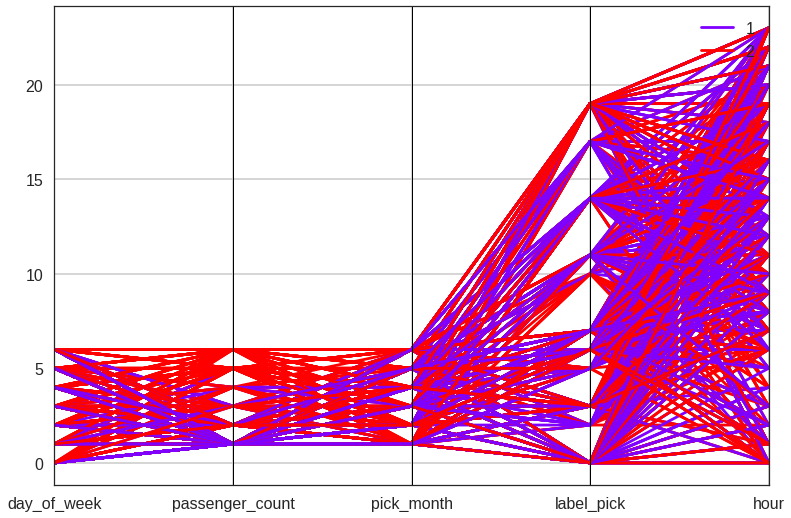

In [29]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(train_data.sample(1200)[['vendor_id','day_of_week', 'passenger_count', 'pick_month','label_pick', 'hour']], 'vendor_id', colormap='rainbow')
plt.show()

# Extracting same features for Test data - 
- We will extract same features for test dataset and then will train xgboost regressor to see how we are doing with prediction, how much predicting power out extracted features have. If we didn't get satisfactory accuracy we will extract extra features and so on..

 1. Loading test data from competition and OSRM features for test data

In [30]:
test_df = pd.read_csv('../input/nyc-taxi-trip-duration/test.csv')
test_fr = pd.read_csv('../input/new-york-city-taxi-with-osrm/fastest_routes_test.csv')
test_fr_new = test_fr[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
test_df = pd.merge(test_df, test_fr_new, on = 'id', how = 'left')
test_df.head()

id  vendor_id      pickup_datetime  passenger_count  \
0  id3004672          1  2016-06-30 23:59:58                1   
1  id3505355          1  2016-06-30 23:59:53                1   
2  id1217141          1  2016-06-30 23:59:47                1   
3  id2150126          2  2016-06-30 23:59:41                1   
4  id1598245          1  2016-06-30 23:59:33                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.988129        40.732029         -73.990173         40.756680   
1        -73.964203        40.679993         -73.959808         40.655403   
2        -73.997437        40.737583         -73.986160         40.729523   
3        -73.956070        40.771900         -73.986427         40.730469   
4        -73.970215        40.761475         -73.961510         40.755890   

  store_and_fwd_flag  total_distance  total_travel_time  number_of_steps  
0                  N          3795.9              424.6                4  
1                  N          2904.5              200.0                4  
2                  N          1499.5              193.2                4  
3                  N          7023.9              494.8               11  
4                  N          1108.2              103.2                4

2.. Extracting date time features - 

In [31]:
start = time.time()
test_data = test_df.copy()
test_data['pickup_datetime'] = pd.to_datetime(test_data.pickup_datetime)
test_data.loc[:, 'pick_month'] = test_data['pickup_datetime'].dt.month
test_data.loc[:, 'hour'] = test_data['pickup_datetime'].dt.hour
test_data.loc[:, 'week_of_year'] = test_data['pickup_datetime'].dt.weekofyear
test_data.loc[:, 'day_of_year'] = test_data['pickup_datetime'].dt.dayofyear
test_data.loc[:, 'day_of_week'] = test_data['pickup_datetime'].dt.dayofweek
end = time.time()
print("Time taken by above cell is {}.".format(end-start))

Time taken by above cell is 2.3723602294921875.


 3.. Extracting distance and directional features - 

In [32]:
strat = time.time()
test_data.loc[:,'hvsine_pick_drop'] = haversine_(test_data['pickup_latitude'].values, test_data['pickup_longitude'].values, test_data['dropoff_latitude'].values, test_data['dropoff_longitude'].values)
test_data.loc[:,'manhtn_pick_drop'] = manhattan_distance_pd(test_data['pickup_latitude'].values, test_data['pickup_longitude'].values, test_data['dropoff_latitude'].values, test_data['dropoff_longitude'].values)
test_data.loc[:,'bearing'] = bearing_array(test_data['pickup_latitude'].values, test_data['pickup_longitude'].values, test_data['dropoff_latitude'].values, test_data['dropoff_longitude'].values)
end = time.time()
print("Time taken by above cell is {}.".format(end-strat))

Time taken by above cell is 1.3859562873840332.


4.. Extracting cluster features - 

In [33]:
start = time.time()
test_data['label_pick'] = k_means.predict(test_data[['pickup_longitude','pickup_latitude']])
test_data['label_drop'] = k_means.predict(test_data[['dropoff_longitude','dropoff_latitude']])
test_cl = pd.merge(test_data, centroid_pickups, how='left', on=['label_pick'])
test_cl = pd.merge(test_cl, centroid_dropoff, how='left', on=['label_drop'])
#test_cl.head()
end = time.time()
print("Time Taken by above cell is {}.".format(end-start))

Time Taken by above cell is 1.8646461963653564.


In [34]:
start = time.time()
test_cl.loc[:,'hvsine_pick_cent_p'] = haversine_(test_cl['pickup_latitude'].values, test_cl['pickup_longitude'].values, test_cl['centroid_pick_lat'].values, test_cl['centroid_pick_long'].values)
test_cl.loc[:,'hvsine_drop_cent_d'] = haversine_(test_cl['dropoff_latitude'].values, test_cl['dropoff_longitude'].values, test_cl['centroid_drop_lat'].values, test_cl['centroid_drop_long'].values)
test_cl.loc[:,'hvsine_cent_p_cent_d'] = haversine_(test_cl['centroid_pick_lat'].values, test_cl['centroid_pick_long'].values, test_cl['centroid_drop_lat'].values, test_cl['centroid_drop_long'].values)
test_cl.loc[:,'manhtn_pick_cent_p'] = manhattan_distance_pd(test_cl['pickup_latitude'].values, test_cl['pickup_longitude'].values, test_cl['centroid_pick_lat'].values, test_cl['centroid_pick_long'].values)
test_cl.loc[:,'manhtn_drop_cent_d'] = manhattan_distance_pd(test_cl['dropoff_latitude'].values, test_cl['dropoff_longitude'].values, test_cl['centroid_drop_lat'].values, test_cl['centroid_drop_long'].values)
test_cl.loc[:,'manhtn_cent_p_cent_d'] = manhattan_distance_pd(test_cl['centroid_pick_lat'].values, test_cl['centroid_pick_long'].values, test_cl['centroid_drop_lat'].values, test_cl['centroid_drop_long'].values)

test_cl.loc[:,'bearing_pick_cent_p'] = bearing_array(test_cl['pickup_latitude'].values, test_cl['pickup_longitude'].values, test_cl['centroid_pick_lat'].values, test_cl['centroid_pick_long'].values)
test_cl.loc[:,'bearing_drop_cent_p'] = bearing_array(test_cl['dropoff_latitude'].values, test_cl['dropoff_longitude'].values, test_cl['centroid_drop_lat'].values, test_cl['centroid_drop_long'].values)
test_cl.loc[:,'bearing_cent_p_cent_d'] = bearing_array(test_cl['centroid_pick_lat'].values, test_cl['centroid_pick_long'].values, test_cl['centroid_drop_lat'].values, test_cl['centroid_drop_long'].values)
test_cl['speed_hvsn'] = test_cl.hvsine_pick_drop/test_cl.total_travel_time
test_cl['speed_manhtn'] = test_cl.manhtn_pick_drop/test_cl.total_travel_time
end = time.time()
print("Time Taken by above cell is {}.".format(end-start))

Time Taken by above cell is 6.3793487548828125.


In [35]:
test_cl.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id3004672          1 2016-06-30 23:59:58                1   
1  id3505355          1 2016-06-30 23:59:53                1   
2  id1217141          1 2016-06-30 23:59:47                1   
3  id2150126          2 2016-06-30 23:59:41                1   
4  id1598245          1 2016-06-30 23:59:33                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.988129        40.732029         -73.990173         40.756680   
1        -73.964203        40.679993         -73.959808         40.655403   
2        -73.997437        40.737583         -73.986160         40.729523   
3        -73.956070        40.771900         -73.986427         40.730469   
4        -73.970215        40.761475         -73.961510         40.755890   

  store_and_fwd_flag  total_distance      ...       hvsine_drop_cent_d  \
0                  N          3795.9      ...                 0.460746   
1                  N          2904.5      ...                 4.035735   
2                  N          1499.5      ...                 0.108194   
3                  N          7023.9      ...                 0.117694   
4                  N          1108.2      ...                 1.015384   

   hvsine_cent_p_cent_d  manhtn_pick_cent_p  manhtn_drop_cent_d  \
0              2.557813            0.316489            0.572701   
1              0.000000            1.680995            4.786109   
2              1.520191            0.425801            0.128054   
3              5.622357            0.327942            0.166444   
4              0.000000            0.620567            1.234923   

   manhtn_cent_p_cent_d  bearing_pick_cent_p  bearing_drop_cent_p  \
0              2.657047           166.844127           163.485813   
1              0.000000           -21.064979           -11.983230   
2              2.144081           -68.660063           -78.185156   
3              7.657602            29.967965          -134.876766   
4              0.000000          -145.882420           -75.681725   

   bearing_cent_p_cent_d  speed_hvsn  speed_manhtn  
0              -2.267563    0.006468      0.006861  
1               0.000000    0.013796      0.015524  
2             130.816473    0.006761      0.009557  
3            -150.583803    0.010649      0.014477  
4               0.000000    0.009310      0.013122  

[5 rows x 37 columns]

# XGB Model
We will use XGBoost regressor for prediction. first we will train XGB on training features and then will use trained model for prediction. Here it's not covered in much detail, its just that we just basic model building approach is explained. For better model building approach read beluga's "from EDA to the TOP" kernel for this competition only. I am mainly keeping this notebook for visualization and eye pleasing experiences only ;)

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings

## WHY PCA ??
## Never occurred to me before but PCA can help in spliting trees.. 

In [37]:
# Lets Add PCA features in the model, reference Beluga's PCA
train = train_cl
test = test_cl
start = time.time()
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values,
                    test[['pickup_latitude', 'pickup_longitude']].values,
                    test[['dropoff_latitude', 'dropoff_longitude']].values))

pca = PCA().fit(coords)
train['pickup_pca0'] = pca.transform(train[['pickup_latitude', 'pickup_longitude']])[:, 0]
train['pickup_pca1'] = pca.transform(train[['pickup_latitude', 'pickup_longitude']])[:, 1]
train['dropoff_pca0'] = pca.transform(train[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
train['dropoff_pca1'] = pca.transform(train[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
test['pickup_pca0'] = pca.transform(test[['pickup_latitude', 'pickup_longitude']])[:, 0]
test['pickup_pca1'] = pca.transform(test[['pickup_latitude', 'pickup_longitude']])[:, 1]
test['dropoff_pca0'] = pca.transform(test[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
test['dropoff_pca1'] = pca.transform(test[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))

Time Taken by above cell is 11.965629816055298.


In [38]:
train['store_and_fwd_flag_int'] = np.where(train['store_and_fwd_flag']=='N', 0, 1)
test['store_and_fwd_flag_int'] = np.where(test['store_and_fwd_flag']=='N', 0, 1)

In [39]:
feature_names = list(train.columns)
print("Difference of features in train and test are {}".format(np.setdiff1d(train.columns, test.columns)))
print("")
do_not_use_for_training = ['pick_date','id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration', 'store_and_fwd_flag']
feature_names = [f for f in train.columns if f not in do_not_use_for_training]
print("We will be using following features for training {}.".format(feature_names))
print("")
print("Total number of features are {}.".format(len(feature_names)))


Difference of features in train and test are ['dropoff_datetime' 'trip_duration']

We will be using following features for training ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'total_distance', 'total_travel_time', 'number_of_steps', 'pick_month', 'hour', 'week_of_year', 'day_of_year', 'day_of_week', 'hvsine_pick_drop', 'manhtn_pick_drop', 'bearing', 'label_pick', 'label_drop', 'centroid_pick_long', 'centroid_pick_lat', 'centroid_drop_long', 'centroid_drop_lat', 'hvsine_pick_cent_p', 'hvsine_drop_cent_d', 'hvsine_cent_p_cent_d', 'manhtn_pick_cent_p', 'manhtn_drop_cent_d', 'manhtn_cent_p_cent_d', 'bearing_pick_cent_p', 'bearing_drop_cent_p', 'bearing_cent_p_cent_d', 'speed_hvsn', 'speed_manhtn', 'pickup_pca0', 'pickup_pca1', 'dropoff_pca0', 'dropoff_pca1', 'store_and_fwd_flag_int'].

Total number of features are 39.


In [40]:
y = np.log(train['trip_duration'].values + 1)


In [41]:
start = time.time()
Xtr, Xv, ytr, yv = train_test_split(train[feature_names].values, y, test_size=0.2, random_state=1987)
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

xgb_pars = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

# You could try to train with more epoch
model = xgb.train(xgb_pars, dtrain, 15, watchlist, early_stopping_rounds=2,
                  maximize=False, verbose_eval=1)
end = time.time()
print("Time taken by above cell is {}.".format(end - start))
print('Modeling RMSLE %.5f' % model.best_score)

[0]	train-rmse:4.22746	valid-rmse:4.22868
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:2.97588	valid-rmse:2.97738
[2]	train-rmse:2.10639	valid-rmse:2.10849
[3]	train-rmse:1.50644	valid-rmse:1.50941
[4]	train-rmse:1.09789	valid-rmse:1.10192
[5]	train-rmse:0.826409	valid-rmse:0.831637
[6]	train-rmse:0.652018	valid-rmse:0.658684
[7]	train-rmse:0.545136	valid-rmse:0.553444
[8]	train-rmse:0.482453	valid-rmse:0.492176
[9]	train-rmse:0.448544	valid-rmse:0.459477
[10]	train-rmse:0.429217	valid-rmse:0.441204
[11]	train-rmse:0.410323	valid-rmse:0.423389
[12]	train-rmse:0.404485	valid-rmse:0.418149
[13]	train-rmse:0.400725	valid-rmse:0.414911
[14]	train-rmse:0.393481	valid-rmse:0.408457
Time taken by above cell is 101.65481948852539.
Modeling RMSLE 0.40846


# Feature Extraction Round 2
## Extract following features as our RMSLE is not going below 0.38
1. pick to drop cluster 
2. drop to pickup cluster 
3. no of lefts 
4. no. of rights ( 3,4 from osrm data)
5. check weather in nyc dataset and see if it can be used as feature

In [42]:
weather = pd.read_csv('../input/weather-data-in-new-york-city-2016/weather_data_nyc_centralpark_2016.csv')
weather.head()

date  maximum temerature  minimum temperature  average temperature  \
0  1-1-2016                  42                   34                 38.0   
1  2-1-2016                  40                   32                 36.0   
2  3-1-2016                  45                   35                 40.0   
3  4-1-2016                  36                   14                 25.0   
4  5-1-2016                  29                   11                 20.0   

  precipitation snow fall snow depth  
0          0.00       0.0          0  
1          0.00       0.0          0  
2          0.00       0.0          0  
3          0.00       0.0          0  
4          0.00       0.0          0

/opt/conda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



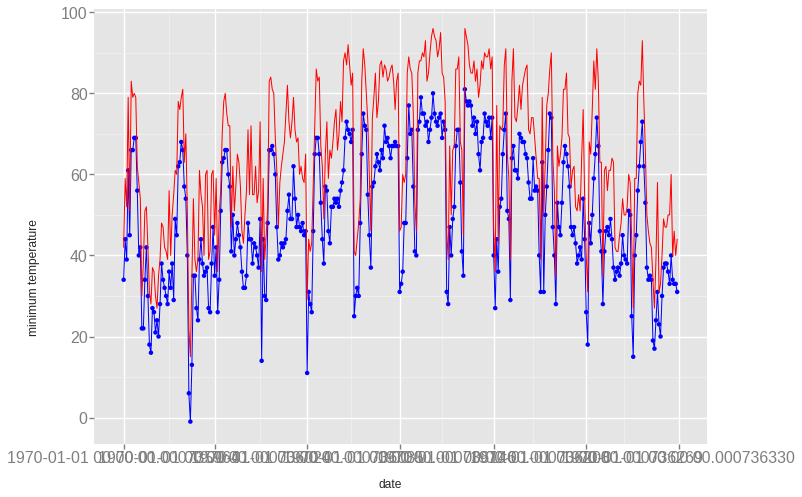

<ggplot: (8779420785181)>

In [43]:
from ggplot import *
weather.date = pd.to_datetime(weather.date)
weather['day_of_year']= weather.date.dt.dayofyear
p = ggplot(aes(x='date'),data=weather) + geom_line(aes(y='minimum temperature', colour = "blue")) + geom_line(aes(y='maximum temerature', colour = "red"))
p + geom_point(aes(y='minimum temperature', colour = "blue")) #+ stat_smooth(colour='yellow', span=0.2)

**Findings** - Clearly In Feb, the temperature falls to 0, and it should have affected the rides as when we check the similar time searies plot of the date vs trip_duration, we can see that trip_duration for both vendors are much large than usual on this day. Let's check just for fun the snowfall and snow depth's chart. we can see that temp on particular day may have some effect on trip_duration, In my opinion that information is covered in day_of_year variable so including this data as a feature will be relectant. Lets see..

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
weather['precipitation'].unique()
weather['precipitation'] = np.where(weather['precipitation']=='T', '0.00',weather['precipitation'])
weather['precipitation'] = list(map(float, weather['precipitation']))
weather['snow fall'] = np.where(weather['snow fall']=='T', '0.00',weather['snow fall'])
weather['snow fall'] = list(map(float, weather['snow fall']))
weather['snow depth'] = np.where(weather['snow depth']=='T', '0.00',weather['snow depth'])
weather['snow depth'] = list(map(float, weather['snow depth']))


In [45]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
random_x = weather['date'].values
random_y0 = weather['precipitation']
random_y1 = weather['snow fall']
random_y2 = weather['snow depth']

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'precipitation'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'markers',
    name = 'snow fall'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'markers',
    name = 'snow depth'
)

data = [trace0, trace1, trace2]
plotly.offline.iplot(data, filename='scatter-mode')

**Findings** - from the plot above, we can say that trips are taking more time if snow fall or snow depth is more than a certain amount, though, this information will be captured in day_of_year variable but I guess including features like precipitation, snow fall, snow depth, and temperature will help in tree- split while modelling, so we will include these features as well.

In [46]:
def freq_turn(step_dir):
    """function to create dummy for turn type"""
    from collections import Counter
    step_dir_new = step_dir.split("|")
    a_list = Counter(step_dir_new).most_common()
    path = {}
    for i in range(len(a_list)):
        path.update({a_list[i]})
    a = 0
    b = 0
    c = 0
    if 'straight' in (path.keys()):
        a = path['straight']
        #print(a)
    if 'left' in (path.keys()):
        b = path['left']
        #print(b)
    if 'right' in (path.keys()):
        c = path['right']
        #print(c)
    return a,b,c

In [47]:
start = time.time()
train_fr['straight']= 0
train_fr['left'] =0
train_fr['right'] = 0
train_fr['straight'], train_fr['left'], train_fr['right'] = zip(*train_fr['step_direction'].map(freq_turn))
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))
#train_fr.head()

Time Taken by above cell is 24.968462467193604.


In [48]:
train_fr_new = train_fr[['id','straight','left','right']]
train = pd.merge(train, train_fr_new, on = 'id', how = 'left')
#train = pd.merge(train, weather, on= 'date', how = 'left')
print(len(train.columns))
#train.columns

47


In [49]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['date'] = train['pickup_datetime'].dt.date
train.head()

train['date'] = pd.to_datetime(train['date'])
train = pd.merge(train, weather[['date','minimum temperature', 'precipitation', 'snow fall', 'snow depth']], on= 'date', how = 'left')
train.shape[0]



1458644

In [50]:
train.loc[:,'hvsine_pick_cent_d'] = haversine_(train['pickup_latitude'].values, train['pickup_longitude'].values, train['centroid_drop_lat'].values, train['centroid_drop_long'].values)
train.loc[:,'hvsine_drop_cent_p'] = haversine_(train['dropoff_latitude'].values, train['dropoff_longitude'].values, train['centroid_pick_lat'].values, train['centroid_pick_long'].values)

test.loc[:,'hvsine_pick_cent_d'] = haversine_(test['pickup_latitude'].values, test['pickup_longitude'].values, test['centroid_drop_lat'].values, test['centroid_drop_long'].values)
test.loc[:,'hvsine_drop_cent_p'] = haversine_(test['dropoff_latitude'].values, test['dropoff_longitude'].values, test['centroid_pick_lat'].values, test['centroid_pick_long'].values)

print("shape of train_features is {}.".format(len(train.columns)))

shape of train_features is 54.


## Let's plot and analyze how these new features behave..

In [51]:
start = time.time()
temp = train[['hvsine_drop_cent_p', 'hvsine_pick_cent_d', 'hvsine_drop_cent_d', 'hvsine_pick_cent_p', 'hvsine_pick_drop', 'hvsine_cent_p_cent_d', 'total_distance']]
temp.total_distance.dropna(inplace = True)
print("total number of Nulls {}.".format(temp.total_distance.isnull().sum()))
# Lets take distance of pick---cent_p---cent_d---drop as distance_pick_cp_cd_drop
# Lets take distance of pick---cent_d---drop as distance_pick_cd_drop
# Lets take distance of pick---cent_p---drop as distance_pick_cp_drop
# Lets take distance of pick--drop as total_distance 
temp['distance_pick_cp_cd_drop'] = temp['hvsine_pick_cent_p'] + temp['hvsine_cent_p_cent_d'] + temp['hvsine_drop_cent_d']
temp['distance_pick_cd_drop'] = temp['hvsine_pick_cent_d'] + temp['hvsine_drop_cent_d']
temp['distance_pick_cp_drop'] = temp['hvsine_pick_cent_p'] + temp['hvsine_drop_cent_p']
temp['total_distance'] = np.floor(temp['total_distance']/1000)
temp['distance_pick_cp_drop'] = np.floor(temp['distance_pick_cp_drop'])
temp['distance_pick_cd_drop'] = np.floor(temp['distance_pick_cd_drop'])
temp['distance_pick_cp_cd_drop'] = np.floor(temp['distance_pick_cp_cd_drop'])
#temp.head()
temp1 = temp.copy()
temp = temp1.sample(100000)
aggregation = {'distance_pick_cp_cd_drop':'count', 'distance_pick_cd_drop':'count', 'distance_pick_cp_drop':'count', 'total_distance':'count'}
temp2 = pd.DataFrame(temp.groupby('total_distance').agg(aggregation))
X_plot = np.linspace(0, temp.total_distance.max(), temp.shape[0])
temp2.rename(columns={'total_distance':'count'}, inplace = True)
temp2.reset_index(inplace = True)
temp2.total_distance = map(int, temp2.total_distance)
temp = temp.sample(100000)
X_plot = temp.total_distance.unique()
a = np.histogram(temp[['total_distance']].values, range(0,95))
N = temp.shape[0]
data = []
trace1 = go.Scatter(x=np.histogram(temp[['total_distance']].values, range(0,95))[1], y=np.histogram(temp[['total_distance']].values, range(0,95))[0],
                    mode='lines', fill='tozeroy',
                    line=dict(color='black', width=2), 
                    name='Total_distance_OSRM')
data.append(trace1)

for kernel in ['distance_pick_cp_cd_drop', 'distance_pick_cd_drop', 'distance_pick_cp_drop']:
    trace2 = go.Scatter(x=np.histogram(temp[['total_distance']].values, range(0,95))[1], y=np.histogram(temp[[kernel]].values, range(0,95))[0],
                        mode='lines', 
                        line=dict(width=2, dash='dash'), 
                        name=kernel)
    data.append(trace2)

layout=go.Layout(annotations=[dict(x=6, y=0.38, showarrow=False,
                                   text="N={0} points".format(N)),
                                   ],
                 xaxis=dict(zeroline=False), hovermode='closest')
fig = go.Figure(data=data, layout=layout)



/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:2726: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



total number of Nulls 0.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

In [52]:
plotly.offline.iplot(fig)  # last 150+ lines of code just to make a beautiful histogram ;) haha

**Findings ** - From the above plot it is clear that the different combination of distnace i.e. pickup to drop distance using pickup----cent_p----cent_d----dropoff etc are comparable to what we have from OSRM data => these distance features will have information and will be helpful for better predictions. 
** Check how these distances are getting compared to that of total distance from OSRM by hovering over above plot**

## Let's checkout holoviews pairplot ..
Similar to sns pairplot, Holoviews also offers a pairplot kind of plot. This plot looks better than seaborn's but its very heavy in nature, if we make Holoview = True below. The plot will get the notebook hanged and this notebook will starttaking very long in loading. Feel free to change in Run and checkout the plot.

In [53]:
Holoviews = False
if Holoviews:
    """Holoview is heavy, it stops to notebook from getting loaded,so
    run this cell if you are running it cell-by-cell mode ;)"""
    import holoviews as hv
    import bokeh
    hv.extension('bokeh', width=95)
    from holoviews.operation import gridmatrix
    temp4 = train.sample(10000)
    temp4['total_distance'] = np.floor(temp4['total_distance']//1000)
    temp4 = temp4[['passenger_count','total_distance', 'total_travel_time', 'number_of_steps', 'hour', 'trip_duration']]
    temp4 = temp4.rename(columns = {'total_distance':'OSRM_total_distance', 'total_travel_time':'OSRM_total_travel_time'})

    ds = hv.Dataset(temp4)
    grouped_by_passenger_count = ds.groupby('passenger_count', container_type=hv.NdOverlay)
    grid = gridmatrix(grouped_by_passenger_count, diagonal_type=hv.Scatter)
    plot_opts = dict(tools=['hover', 'box_select'], bgcolor='#efe8e2')
    style = dict(fill_alpha=0.2, size=4)
    grid({'Scatter': {'plot': plot_opts, 'style': style}})


## Let's check correlation using a heatmap and check how the features are correlated ..

/opt/conda/lib/python3.6/site-packages/seaborn/palettes.py:725: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.

/opt/conda/lib/python3.6/site-packages/seaborn/palettes.py:725: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.

/opt/conda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning:

elementwise == comparison failed; this will raise an error in the future.

/opt/conda/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning:

elementwise == comparison failed; this will raise an error in the future.



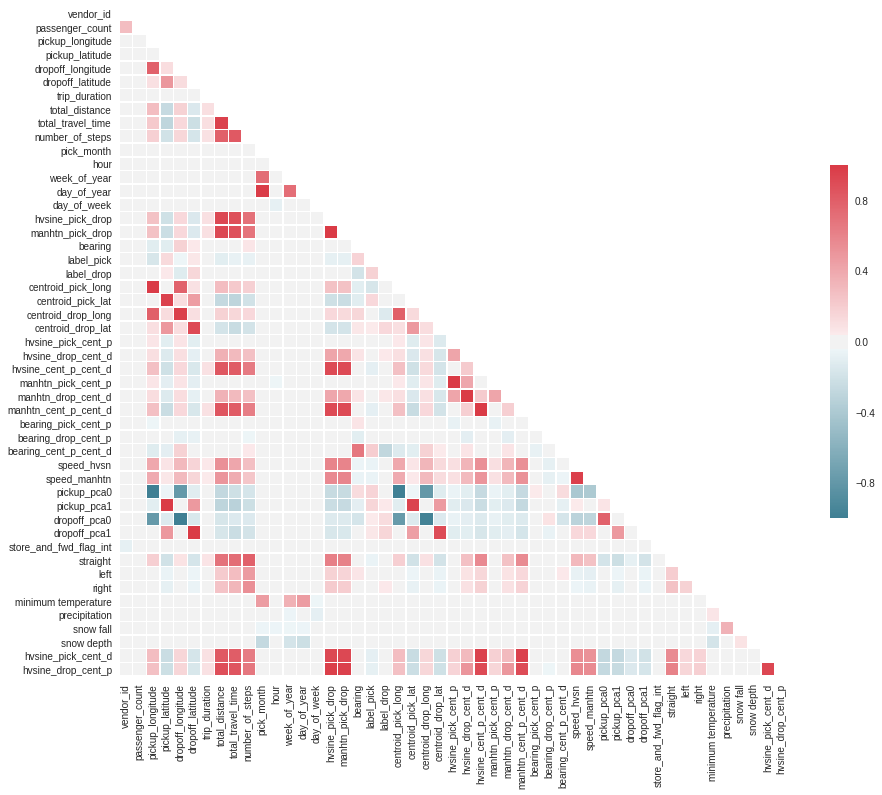

In [54]:
sns.set(style="white")

# Generate a large random dataset
temp3 = train.copy()

# Compute the correlation matrix
corr = temp3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

** Findings ** - 
- Variables like pick_month, week_of_year, day_of_year etc are of very less importance and are not at all related to other variables.
- OSRM variables are very important => correlation is as high as 0.8
- Strong correlation is observed between different IDVs but we will be using tree based model so No need to remove those variables which are highly correlated. ( thought try removing for Robustness of model)
-Trip Duration is slight correated with many IDVs

## Test features extraction Round 2

In [55]:
start = time.time()
test_fr['straight']= 0
test_fr['left'] =0
test_fr['right'] = 0
test_fr['straight'], test_fr['left'], test_fr['right'] = zip(*test_fr['step_direction'].map(freq_turn))
end = time.time()
print("Time Taken by above cell is {}.".format(end - start))
#test_fr.head()

Time Taken by above cell is 10.740335464477539.


In [56]:
test_fr_new = test_fr[['id','straight','left','right']]
test = pd.merge(test, test_fr_new, on = 'id', how = 'left')
print(len(test.columns))
#test.columns

47


In [57]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['date'] = test['pickup_datetime'].dt.date
test['date'] = pd.to_datetime(test['date'])

In [58]:
test= pd.merge(test, weather[['date','minimum temperature', 'precipitation', 'snow fall', 'snow depth']], on= 'date', how = 'left')
feature_names = list(train.columns)
print("Difference of features in train and test are {}".format(np.setdiff1d(train.columns, test.columns)))
print("")
do_not_use_for_training = ['pick_date','id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration', 'store_and_fwd_flag', 'date']
feature_names = [f for f in train.columns if f not in do_not_use_for_training]
print("We will be using following features for training {}.".format(feature_names))
print("")
print("Total number of features are {}.".format(len(feature_names)))

Difference of features in train and test are ['dropoff_datetime' 'trip_duration']

We will be using following features for training ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'total_distance', 'total_travel_time', 'number_of_steps', 'pick_month', 'hour', 'week_of_year', 'day_of_year', 'day_of_week', 'hvsine_pick_drop', 'manhtn_pick_drop', 'bearing', 'label_pick', 'label_drop', 'centroid_pick_long', 'centroid_pick_lat', 'centroid_drop_long', 'centroid_drop_lat', 'hvsine_pick_cent_p', 'hvsine_drop_cent_d', 'hvsine_cent_p_cent_d', 'manhtn_pick_cent_p', 'manhtn_drop_cent_d', 'manhtn_cent_p_cent_d', 'bearing_pick_cent_p', 'bearing_drop_cent_p', 'bearing_cent_p_cent_d', 'speed_hvsn', 'speed_manhtn', 'pickup_pca0', 'pickup_pca1', 'dropoff_pca0', 'dropoff_pca1', 'store_and_fwd_flag_int', 'straight', 'left', 'right', 'minimum temperature', 'precipitation', 'snow fall', 'snow depth', 'hvsine_pick_cent_d', 'hvsine_drop_cent_p']

In [59]:
y = np.log(train['trip_duration'].values + 1)


In [60]:
Xtr, Xv, ytr, yv = train_test_split(train[feature_names].values, y, test_size=0.2, random_state=1987)
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

start = time.time()
xgb_par = {'min_child_weight': 20, 'eta': 0.05, 'colsample_bytree': 0.5, 'max_depth': 15,
            'subsample': 0.9, 'lambda': 2.0, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

model_1 = xgb.train(xgb_par, dtrain, 10, watchlist, early_stopping_rounds=4, maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)
end = time.time()
print("Time taken in training is {}.".format(end - start))

[0]	train-rmse:5.72053	valid-rmse:5.72143
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 4 rounds.
[1]	train-rmse:5.43649	valid-rmse:5.43745
[2]	train-rmse:5.1667	valid-rmse:5.16771
[3]	train-rmse:4.91055	valid-rmse:4.91162
[4]	train-rmse:4.6675	valid-rmse:4.66862
[5]	train-rmse:4.43625	valid-rmse:4.43741
[6]	train-rmse:4.21684	valid-rmse:4.21806
[7]	train-rmse:4.0085	valid-rmse:4.00979
[8]	train-rmse:3.8104	valid-rmse:3.81175
[9]	train-rmse:3.62261	valid-rmse:3.62403
Modeling RMSLE 0.40846
Time taken in training is 82.1860671043396.


In [61]:
print('Modeling RMSLE %.5f' % model_1.best_score)
end = time.time()
print("Time taken in training is {}.".format(end - start))
start = time.time()
yvalid = model_1.predict(dvalid)
ytest = model_1.predict(dtest)
end = time.time()
print("Time taken in prediction is {}.".format(end - start))

Modeling RMSLE 3.62403
Time taken in training is 82.2052710056305.
Time taken in prediction is 0.6673638820648193.


/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



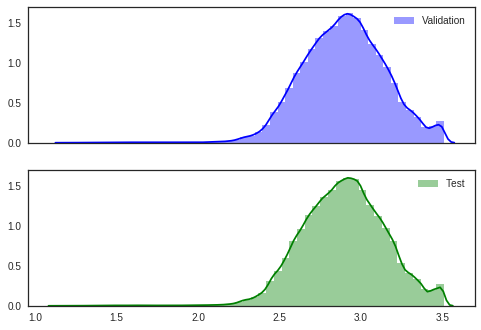

Time taken by above cell is 1.0401575565338135.


In [62]:
# Lets check how the distribution of test and vaidation set looks like ...
start = time.time()
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.distplot(yvalid, ax=ax[0], color='blue', label='Validation')
sns.distplot(ytest, ax=ax[1], color='green', label='Test')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()
end = time.time()
print("Time taken by above cell is {}.".format((end-start)))

In [63]:
start = time.time()
if test.shape[0] == ytest.shape[0]:
    print('Test shape OK.') 
test['trip_duration'] = np.exp(ytest) - 1
test[['id', 'trip_duration']].to_csv('mahesh_xgb_submission.csv', index=False)
end = time.time()
print("Time taken in training is {}.".format(end - start))

Test shape OK.
Time taken in training is 1.7414436340332031.


**This concludes NYC taxi trip duration competition. We can do further things like ensambling and all, which I won't be doing. Feel free to form and do your own further analysis. I hope you enjoyed visualizations and chronological thinking**

# Appendix 
- ** Folowing Plots are made using pygmaps package, and this package is not supported by kaggle So, I am providing codes for this But the plots will generate in OUTPUT as txt files. Now, to see them one has tconvert them to HTML and then open in browser**

## As we want to use Google maps for visualization, we use following code from pygmaps v0.1.1

In [64]:
class maps:

	def __init__(self, centerLat, centerLng, zoom ):
		self.center = (float(centerLat),float(centerLng))
		self.zoom = int(zoom)
		self.grids = None
		self.paths = []
		self.points = []
		self.radpoints = []
		self.gridsetting = None
		self.coloricon = 'http://chart.apis.google.com/chart?cht=mm&chs=12x16&chco=FFFFFF,XXXXXX,000000&ext=.png'

	def setgrids(self,slat,elat,latin,slng,elng,lngin):
		self.gridsetting = [slat,elat,latin,slng,elng,lngin]

	def addpoint(self, lat, lng, color = '#FF0000'):
		self.points.append((lat,lng,color[1:]))

	#def addpointcoord(self, coord):
	#	self.points.append((coord[0],coord[1]))

	def addradpoint(self, lat,lng,rad,color = '#0000FF'):
		self.radpoints.append((lat,lng,rad,color))

	def addpath(self,path,color = '#FF0000'):
		path.append(color)
		self.paths.append(path)
	
	#create the html file which inlcude one google map and all points and paths
	def draw(self, htmlfile):
		f = open(htmlfile,'w')
		f.write('<html>\n')
		f.write('<head>\n')
		f.write('<meta name="viewport" content="initial-scale=1.0, user-scalable=no" />\n')
		f.write('<meta http-equiv="content-type" content="text/html; charset=UTF-8"/>\n')
		f.write('<title>Google Maps - pygmaps </title>\n')
		f.write('<script type="text/javascript" src="http://maps.google.com/maps/api/js?sensor=false"></script>\n')
		f.write('<script type="text/javascript">\n')
		f.write('\tfunction initialize() {\n')
		self.drawmap(f)
		self.drawgrids(f)
		self.drawpoints(f)
		self.drawradpoints(f)
		self.drawpaths(f,self.paths)
		f.write('\t}\n')
		f.write('</script>\n')
		f.write('</head>\n')
		f.write('<body style="margin:0px; padding:0px;" onload="initialize()">\n')
		f.write('\t<div id="map_canvas" style="width: 100%; height: 100%;"></div>\n')
		f.write('</body>\n')
		f.write('</html>\n')
		f.close()

	def drawgrids(self, f):
		if self.gridsetting == None:
			return
		slat = self.gridsetting[0]
		elat = self.gridsetting[1]
		latin = self.gridsetting[2]
		slng = self.gridsetting[3]
		elng = self.gridsetting[4]
		lngin = self.gridsetting[5]
		self.grids = []

		r = [slat+float(x)*latin for x in range(0, int((elat-slat)/latin))]
		for lat in r:
			self.grids.append([(lat+latin/2.0,slng+lngin/2.0),(lat+latin/2.0,elng+lngin/2.0)])

		r = [slng+float(x)*lngin for x in range(0, int((elng-slng)/lngin))]
		for lng in r:
			self.grids.append([(slat+latin/2.0,lng+lngin/2.0),(elat+latin/2.0,lng+lngin/2.0)])
		
		for line in self.grids:
			self.drawPolyline(f,line,strokeColor = "#000000")
	def drawpoints(self,f):
		for point in  self.points:
			self.drawpoint(f,point[0],point[1],point[2])

	def drawradpoints(self, f):
		for rpoint in self.radpoints:
			path = self.getcycle(rpoint[0:3])
			self.drawPolygon(f,path,strokeColor = rpoint[3])

	def getcycle(self,rpoint):
		cycle = []
		lat = rpoint[0]
		lng = rpoint[1]
		rad = rpoint[2] #unit: meter
		d = (rad/1000.0)/6378.8;
		lat1 = (math.pi/180.0)* lat
		lng1 = (math.pi/180.0)* lng

		r = [x*30 for x in range(12)]
		for a in r:
			tc = (math.pi/180.0)*a;
			y = math.asin(math.sin(lat1)*math.cos(d)+math.cos(lat1)*math.sin(d)*math.cos(tc))
			dlng = math.atan2(math.sin(tc)*math.sin(d)*math.cos(lat1),math.cos(d)-math.sin(lat1)*math.sin(y))
			x = ((lng1-dlng+math.pi) % (2.0*math.pi)) - math.pi 
			cycle.append( ( float(y*(180.0/math.pi)),float(x*(180.0/math.pi)) ) )
		return cycle

	def drawpaths(self, f, paths):
		for path in paths:
			#print path
			self.drawPolyline(f,path[:-1], strokeColor = path[-1])

	#############################################
	# # # # # # Low level Map Drawing # # # # # # 
	#############################################
	def drawmap(self, f):
		f.write('\t\tvar centerlatlng = new google.maps.LatLng(%f, %f);\n' % (self.center[0],self.center[1]))
		f.write('\t\tvar myOptions = {\n')
		f.write('\t\t\tzoom: %d,\n' % (self.zoom))
		f.write('\t\t\tcenter: centerlatlng,\n')
		f.write('\t\t\tmapTypeId: google.maps.MapTypeId.ROADMAP\n')
		f.write('\t\t};\n')
		f.write('\t\tvar map = new google.maps.Map(document.getElementById("map_canvas"), myOptions);\n')
		f.write('\n')



	def drawpoint(self,f,lat,lon,color):
		f.write('\t\tvar latlng = new google.maps.LatLng(%f, %f);\n'%(lat,lon))
		f.write('\t\tvar img = new google.maps.MarkerImage(\'%s\');\n' % (self.coloricon.replace('XXXXXX',color)))
		f.write('\t\tvar marker = new google.maps.Marker({\n')
		f.write('\t\ttitle: "no implimentation",\n')
		f.write('\t\ticon: img,\n')
		f.write('\t\tposition: latlng\n')
		f.write('\t\t});\n')
		f.write('\t\tmarker.setMap(map);\n')
		f.write('\n')
		
	def drawPolyline(self,f,path,\
			clickable = False, \
			geodesic = True,\
			strokeColor = "#FF0000",\
			strokeOpacity = 1.0,\
			strokeWeight = 2
			):
		f.write('var PolylineCoordinates = [\n')
		for coordinate in path:
			f.write('new google.maps.LatLng(%f, %f),\n' % (coordinate[0],coordinate[1]))
		f.write('];\n')
		f.write('\n')

		f.write('var Path = new google.maps.Polyline({\n')
		f.write('clickable: %s,\n' % (str(clickable).lower()))
		f.write('geodesic: %s,\n' % (str(geodesic).lower()))
		f.write('path: PolylineCoordinates,\n')
		f.write('strokeColor: "%s",\n' %(strokeColor))
		f.write('strokeOpacity: %f,\n' % (strokeOpacity))
		f.write('strokeWeight: %d\n' % (strokeWeight))
		f.write('});\n')
		f.write('\n')
		f.write('Path.setMap(map);\n')
		f.write('\n\n')

	def drawPolygon(self,f,path,\
			clickable = False, \
			geodesic = True,\
			fillColor = "#000000",\
			fillOpacity = 0.0,\
			strokeColor = "#FF0000",\
			strokeOpacity = 1.0,\
			strokeWeight = 1
			):
		f.write('var coords = [\n')
		for coordinate in path:
			f.write('new google.maps.LatLng(%f, %f),\n' % (coordinate[0],coordinate[1]))
		f.write('];\n')
		f.write('\n')

		f.write('var polygon = new google.maps.Polygon({\n')
		f.write('clickable: %s,\n' % (str(clickable).lower()))
		f.write('geodesic: %s,\n' % (str(geodesic).lower()))
		f.write('fillColor: "%s",\n' %(fillColor))
		f.write('fillOpacity: %f,\n' % (fillOpacity))
		f.write('paths: coords,\n')
		f.write('strokeColor: "%s",\n' %(strokeColor))
		f.write('strokeOpacity: %f,\n' % (strokeOpacity))
		f.write('strokeWeight: %d\n' % (strokeWeight))
		f.write('});\n')
		f.write('\n')
		f.write('polygon.setMap(map);\n')
		f.write('\n\n')




In [65]:
def show_gmaps(train_data, path):
    """function to generate map and add the pick up and drop coordinates
    1. Path = 1 : Join pickup (blue) and drop(red) using a straight line
    """
    mymap = maps(40.767937, -73.982155, 12) # manually added centre
    for i in range(train_data.shape[0]):
        pick_long = train_data.loc[train_data.index ==i]['pickup_longitude'].values[0]
        pick_lat = train_data.loc[train_data.index ==i]['pickup_latitude'].values[0]
        dest_long = train_data.loc[train_data.index ==i]['dropoff_longitude'].values[0]
        dest_lat = train_data.loc[train_data.index ==i]['dropoff_latitude'].values[0]
        mymap.addpoint(pick_lat, pick_long, "#FF0000")
        #mymap.addradpoint(dest_lat, dest_long, 50, "#00FF00")
        #mymap.getcycle([dest_lat, dest_long, 0.01])
        mymap.addpoint(dest_lat, dest_long, "#0000FF")
        #if path == 1:
        path = [(pick_lat, pick_long),(dest_lat, dest_long)]
        mymap.addpath(path,"#000000")
        if i%1000 == 0:
            print(i, dest_lat, dest_long) #time.time(),
    mymap.draw('./Google_map_showing_trips.txt')
    return 

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

time taken by thie script by now is 2.4483067989349365.


In [66]:
# Lets visulalize a sample of 200 trips from all data
train_sample_vis = train_data.loc[np.random.randint(1458644, size =200)]
train_sample_vis.reset_index(drop = True, inplace = True)
show_gmaps(train_sample_vis, 1)
#print( os.listdir('../input/'))

from IPython.display import IFrame, HTML, display
IFrame(HTML('../kaggle/working/Google_map_showing_trips.txt'), width=1000, height=500)


end = time.time()
print("time taken by thie script by now is {}.".format(end-start))




0 40.8010520935 -73.9689788818
time taken by thie script by now is 3.1670894622802734.


From Above visualization on google maps, its clear that most of the cabs rides are situated in manhatten and few in the lesf of manhattan and few on the right. Few rides' pick drop are very far from manhattan, but there are suchs rides, like going to Airport JFK, and few rides locations are in SF, california. So, which brings us to idea of clsuteing them and then analysing where the clusters are falling. Expected is that most of the clusters will fall in manhattan and few will fall nearby manhattan.

Except it clustering is very advisible as total number of queries in train data is ~1.4M, which is very larger number , and using google map's distance matrix the pickup address, drop address, and shortest path distance for cars, and avg time taken from pickup tpo drop is not possible as free query limit is 2500 queries per day. so, if we do clustering and we reduce the number of queries, we ca use distance matrix's data for going from centroid of one cluster to another and then using normal, haversine or manhattan distance for going from centroid of cluster to destination. 



In [67]:
df_cluster4 = train_cl

In [68]:
start = time.time()
centroid_drops = centroid_pickups.rename(columns={'centroid_pick_long':'centroid_drop_long', 'centroid_pick_lat':'centroid_drop_lat','label_pick':'label_drop'})
centroid_drops.head()
clus5 = df_cluster4 # just to be safe side so store it
df_cluster4 = pd.merge(df_cluster4, centroid_drops, how='left', on=['label_drop'])
df_cluster4.head()

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

time taken by thie script by now is 8.265459537506104.


In [69]:
%matplotlib inline
def bar_plot(x_var, y_var):
    """function to show barplot between two variables"""
    objects = x_var
    performance = y_var
    plt.bar(objects, performance, align='center', alpha=0.5)
    plt.xlabel('class')
    plt.ylabel('frequency')
    plt.title('barplot') 
    plt.show()
    return 0

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

time taken by thie script by now is 8.282379627227783.


## Cluster processing and distance matrix query 

### cluster vs trip time
##### Hypothesis is if trip starts and ends in same cluster, duration of that trip will be less than trips where pickup and dropoff are in different clusters

df_cluster3 = df_clusters2
df_cluster3['diff']= abs(df_clusters2['label_pick']- df_clusters2['label_drop'])
summary_s = pd.DataFrame(df_cluster3.groupby('diff')['trip_duration'].sum())
summary_c = pd.DataFrame(df_cluster3.groupby('diff')['trip_duration'].count())
summary_c.rename(columns={'trip_duration': 'count'}, inplace=True)
summary_pertrip = pd.concat([summary_s, summary_c], axis=1)
summary_pertrip.head()
summary_pertrip['time_pt'] = summary_pertrip['trip_duration']/summary_pertrip['count']
bar_plot(summary_pertrip.index.values, summary_pertrip.time_pt.values)

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

### Clear from above plot that trips ending in same clusters have minimum time 
### Let's visualize location of clusters (All clusters) on google maps - Download HTML file from output and open in google chrome

In [70]:
def show_cluster_gmaps(train_df, cluster_df, points_per_cluster, cluster_list, path, name):
    """function to vasualize cluster 
    1. train_df - df containg lat-long
    2. cluster_df - df containing cluster centroid
    3. points_per_cluster = number od coordniates shown per cluster
    4. cluster_list - list of clusters you want to show on map
    5. path - if 1, show paths to cluster centroid"""
    cluster_df_new = cluster_df[cluster_df['label_pick'].isin(cluster_list)]
    init_lat = cluster_df_new.centroid_pick_lat.mean()
    init_long = cluster_df_new.centroid_pick_long.mean()
    print(init_lat, init_long)
    mymap = maps(init_lat,init_long, 12) # manually added centre
    cluster_df_new = cluster_df_new.reset_index(drop = True)
    #print(cluster_df_new)
    for i in range(cluster_df_new.shape[0]):
        pick_long = cluster_df_new.loc[cluster_df_new.index ==i]['centroid_pick_long'].values[0]
        pick_lat = cluster_df_new.loc[cluster_df_new.index ==i]['centroid_pick_lat'].values[0]
        mymap.addpoint(pick_lat, pick_long, "#FF0000")
        mymap.addradpoint(pick_lat, pick_long, 750, "#0000FF")
        #mymap.getcycle([pick_lat, pick_long, 0.01])
    mymap.draw('./cluster_map_'+name+'.txt')
    return

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

time taken by thie script by now is 8.407092094421387.


In [71]:
cluster_list = range(0,20)
#summary_significant_clusters.tolist()
#print(cluster_list)
show_cluster_gmaps(train_data.head(100), centroid_pickups, 30, cluster_list, 1, 'all clusters')

from IPython.display import IFrame
IFrame('cluster_map_all clusters.txt', width=1000, height=500)

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

40.70272478370286 -75.23245701933175
time taken by thie script by now is 8.587237119674683.


### Visualize clusters which are significant i.e have more than 50k pickups from training data 

In [72]:
summary_clusters_time = pd.DataFrame(df_cluster4.groupby('label_pick')['trip_duration'].count())
summary_significant_clusters = summary_clusters_time.loc[summary_clusters_time['trip_duration']>50000].index.values
summary_significant_clusters
cluster_list = summary_significant_clusters.tolist()

print("list of clusters with 50k pick ups are - {}.".format(cluster_list))
show_cluster_gmaps(train_data.head(100), centroid_pickups, 30, cluster_list, 1, 'significant')

from IPython.display import IFrame
IFrame('cluster_map_significant.txt', width=1000, height=500)

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

list of clusters with 50k pick ups are - [0, 3, 6, 7, 11, 14, 17, 19].
40.756079813736335 -73.98134716410911
time taken by thie script by now is 12.233002662658691.


In [73]:
index_rand = np.random.randint(len(cluster_list),size =4)
print(cluster_list, len(cluster_list))
cluster_list4 = [cluster_list[x] for x in index_rand]
print(cluster_list4)

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

[0, 3, 6, 7, 11, 14, 17, 19] 8
[3, 7, 17, 17]
time taken by thie script by now is 12.244641304016113.


#### We can easily check in last map that all the significant clusters are falling in manhattan

### Travel visualization - cluster to cluster 
#### pickup ---------pick_cluster----------------------------------------dest_cluster--------destination

In [74]:
# cluster visualization - 
def cluster_visualization(train_df, cluster_df, points_per_cluster, cluster_list, path_mode):
    """function to vasualize cluster 
    1. train_df - df containg lat-long
    2. cluster_df - df containing cluster centroid
    3. points_per_cluster = number od coordniates shown per cluster
    4. cluster_list - list of clusters you want to show on map - only two clusters
    5. path - if 1, show paths to cluster centroid"""
    cluster_df_new = cluster_df[cluster_df['label_pick'].isin(cluster_list)]
    init_lat = cluster_df_new.centroid_pick_lat.mean()
    init_long = cluster_df_new.centroid_pick_long.mean()
    print(init_lat, init_long)
    train_df_new = train_df[train_df['label_pick'].isin(cluster_list)]
    train_df_new = train_df_new.reset_index(drop = True)
    sample_list = np.random.randint(train_df_new.shape[0], size = 100) # INITIAL 50
    sample_df = train_df_new.loc[sample_list]
    sample_df = sample_df.reset_index(drop = True)
    #print(sample_df.head())
    
    mymap = maps(init_lat,init_long, 13.5) # manually added centre #INITIAL - 12
    cluster_df_new = cluster_df_new.reset_index(drop = True)
    #print(cluster_df_new)
    for i in range(cluster_df_new.shape[0]):
        pick_long = cluster_df_new.loc[cluster_df_new.index ==i]['centroid_pick_long'].values[0]
        pick_lat = cluster_df_new.loc[cluster_df_new.index ==i]['centroid_pick_lat'].values[0]
        mymap.addpoint(pick_lat, pick_long, "#FF0000")
        mymap.addradpoint(pick_lat, pick_long, 750, "#0000FF")
        sample_df_clus = sample_df.loc[sample_df['label_pick'] == cluster_df_new.loc[i]['label_pick']]
        sample_df_clus = sample_df_clus.reset_index(drop = True)
        for j in range(sample_df_clus.shape[0]):
            sample_lat = sample_df_clus.loc[j]['pickup_latitude']
            sample_long = sample_df_clus.loc[j]['pickup_longitude']
            mymap.addpoint(sample_lat, sample_long, "#FF0000")
            path = [(pick_lat, pick_long),(sample_lat, sample_long)]
            mymap.addpath(path,"#000000")
    if path_mode ==1:
        for k in range(cluster_df_new.shape[0]):
            ln1 = cluster_df_new.loc[cluster_df_new.index ==k]['centroid_pick_long'].values[0]
            lt1 = cluster_df_new.loc[cluster_df_new.index ==k]['centroid_pick_lat'].values[0]
            for l in range(cluster_df_new.shape[0]):
                if k!=l:
                    ln2 = cluster_df_new.loc[cluster_df_new.index ==l]['centroid_pick_long'].values[0]
                    lt2 = cluster_df_new.loc[cluster_df_new.index ==l]['centroid_pick_lat'].values[0]
                    path_c = [(lt1, ln1),(lt2, ln2)]
                    mymap.addpath(path_c,"#000000")
                    #print('path added')
    mymap.draw('./multi_clusters_.txt')
    return

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

time taken by thie script by now is 12.393543004989624.


In [75]:
cluster_list = cluster_list4#[0, 13, 26, 39] #INITIAL 9,23, 21,23, 33- 23,
print(cluster_list4)
#summary_significant_clusters.tolist()
#[ 0,  3,  7,  9, 12, 13, 15, 19, 21, 23, 25, 28, 33, 39, 41, 42]
print("clusters which are getting shown on Google maps are - {}.".format(cluster_list))
cluster_visualization(df_cluster4, centroid_pickups, 30, cluster_list, 1)

from IPython.display import IFrame
IFrame('multi_clusters_.txt', width=1000, height=500)

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

[3, 7, 17, 17]
clusters which are getting shown on Google maps are - [3, 7, 17, 17].
40.77654950868261 -73.96694936954978
time taken by thie script by now is 13.733973264694214.


### For distance matrix query, we create C(45,2) = 1980 pairs and find- 1. Shortest path for cars, 2. Avg. time for cars, 3. Origin address, and 4. destination address

In [76]:
# creating a df containing all such combinations
df_clus_pick_dest = pd.DataFrame(columns=('pick_long', 'pick_lat', 'pick_label','drop_long', 'drop_lat', 'drop_label'))
list_vars =[]
k = centroid_pickups.shape[0]
for i in range(0,centroid_pickups.shape[0]):
    for j in range(0,centroid_pickups.shape[0]):
        if i !=j:
            pick_long = centroid_pickups.loc[i]['centroid_pick_long']
            pick_lat = centroid_pickups.loc[i]['centroid_pick_lat']
            pick_label = centroid_pickups.loc[i]['label_pick']
            drop_long = centroid_pickups.loc[j]['centroid_pick_long']
            drop_lat = centroid_pickups.loc[j]['centroid_pick_lat']
            drop_label = centroid_pickups.loc[j]['label_pick']
            list_data = [pick_long, pick_lat, pick_label, drop_long, drop_lat, drop_label]
            df_clus_pick_dest.loc[i*k+j] = list_data
            
print(df_clus_pick_dest.shape[0])           
df_clus_pick_dest.head()

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

380
time taken by thie script by now is 15.026861190795898.


# Hacking into Distance Matrix Api and requesting information -

In [77]:
#df_clus_pick_dest['data_from_google']=''
global count_hhh 
count_hhh = 0
def google_maps_query(row):
    """
    function to use google api on source and destination co-ordinates 
    returns following - 
    1. origin address 
    2. destination address
    3. duration ~ duration from distance matrix api
    4. distance of shrtest path
    """
    orig_lat = row['pick_lat']
    orig_lng = row['pick_long']
    dest_lat = 	row['drop_lat']
    dest_lng =  row['drop_long']
    url = """http://maps.googleapis.com/maps/api/distancematrix/json?origins=%s,%s"""%(orig_lat, orig_lng)+  \
    """&destinations=%s,%s&mode=driving&language=en-EN&sensor=false"""% (dest_lat, dest_lng)
    result= simplejson.load(urllib.urlopen(url))
    global count_hhh
    count_hhh = count_hhh + 1
    if count_hhh % 198 ==0:
        print(count_hhh//197, time.time())
    return result

def origin_address(row):
    return row['data_from_google']['origin_addresses']

def destination_address(row):
    return row['data_from_google']['destination_addresses']

def gmaps_duration(row):
    """function to extract the duration of ride"""
    if row['data_from_google']['status'] =='OK':
        if len(row['data_from_google']['rows'][0]['elements'][0].keys())==3:
            query_result = row['data_from_google']['rows'][0]['elements'][0]['duration']['value']
        else:
            query_result = np.nan
    else:
        query_result = np.nan
    return(query_result)

def gmaps_distance(row):
    """function to extract the dstance of ride"""
    if row['data_from_google']['status'] =='OK':
        if len(row['data_from_google']['rows'][0]['elements'][0].keys())==3:
            query_result = row['data_from_google']['rows'][0]['elements'][0]['distance']['value']
        else:
            query_result = np.nan
    else:
        query_result = np.nan
    return(query_result)

end = time.time()
print("time taken by thie script by now is {}.".format(end-start))

time taken by thie script by now is 15.065956354141235.


In [78]:
print("Thanks for reading my kernel, I hope you enjoyed it!!")

Thanks for reading my kernel, I hope you enjoyed it!!
